# AMP®-Parkinson's Disease Progression Prediction

Đồ án cuối kì - Ứng dụng Khoa học dữ liệu

Nhóm: **BBTD**

Danh sách thành viên:

* 19120454 - Bùi Quang Bảo (*)
* 19120462 - Lục Minh Bửu
* 19120151 - Nguyễn Trí Tuệ
* 19120186 - Đỗ Lê Khánh Đăng

Table of Contents: *Phía bên phải của trang Kaggle*

# 1. GIỚI THIỆU ĐỀ TÀI CUỘC THI 🧠
Cuộc thi này có tên là : [**AMP®-Parkinson's Disease Progression Prediction**](https://www.kaggle.com/competitions/amp-parkinsons-disease-progression-prediction). <br/>

Bệnh Parkinson là một loại bệnh thoái hóa chậm tiến triển của hệ thần kinh trung ương, chủ yếu ảnh hưởng đến hệ thống vận động. Hiện tại không có thuốc chữa cho bệnh này và bệnh nặng lên theo thời gian 💀.<br/>
Thang điểm phân độ bệnh Parkinson của Hiệp hội Rối loạn Vận động (**MDS-UPDRS**) là một đánh giá toàn diện về cả triệu chứng chuyển động và phi chuyển động. Đây là thang đo giúp đánh giá tiến triển của bệnh Parkinson.<br/>

**Mục tiêu chính của cuộc thi**: 

Phát triển một mô hình được huấn luyện trên tập dữ liệu về **mức độ protein và peptide theo thời gian** ở **những người mắc bệnh Parkinson so với những người cùng tuổi bình thường** để dự đoán điểm **MDS-UPDR** (điểm này dùng cho đo lường sự tiến triển của bệnh nhân mắc bệnh Parkinson).

# 2. TIỀN XỬ LÝ - KHÁM PHÁ DỮ LIỆU 🔭

# 2.1 Giới thiệu bộ dữ liệu 🗂️

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np                # linear algebra
import pandas as pd               # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px       #visualization
import plotly.graph_objects as go #visualization
import amp_pd_peptide             #TEST-API
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from plotly.subplots import make_subplots
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amp-parkinsons-disease-progression-prediction/train_proteins.csv
/kaggle/input/amp-parkinsons-disease-progression-prediction/train_clinical_data.csv
/kaggle/input/amp-parkinsons-disease-progression-prediction/public_timeseries_testing_util.py
/kaggle/input/amp-parkinsons-disease-progression-prediction/supplemental_clinical_data.csv
/kaggle/input/amp-parkinsons-disease-progression-prediction/train_peptides.csv
/kaggle/input/amp-parkinsons-disease-progression-prediction/amp_pd_peptide/competition.cpython-37m-x86_64-linux-gnu.so
/kaggle/input/amp-parkinsons-disease-progression-prediction/amp_pd_peptide/__init__.py
/kaggle/input/amp-parkinsons-disease-progression-prediction/amp_pd_peptide_310/competition.cpython-310-x86_64-linux-gnu.so
/kaggle/input/amp-parkinsons-disease-progression-prediction/amp_pd_peptide_310/__init__.py
/kaggle/input/amp-parkinsons-disease-progression-prediction/example_test_files/sample_submission.csv
/kaggle/input/amp-parkinsons-disease-progression-pre

In [2]:
data_proteins     = pd.read_csv('/kaggle/input/amp-parkinsons-disease-progression-prediction/train_proteins.csv')
data_clinical     = pd.read_csv('/kaggle/input/amp-parkinsons-disease-progression-prediction/train_clinical_data.csv')
data_peptides     = pd.read_csv('/kaggle/input/amp-parkinsons-disease-progression-prediction/train_peptides.csv')
data_supplemental = pd.read_csv('/kaggle/input/amp-parkinsons-disease-progression-prediction/supplemental_clinical_data.csv')

In [3]:
data_proteins

,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0
2,55_0,0,55,O00584,39585.8
3,55_0,0,55,O14498,41526.9
4,55_0,0,55,O14773,31238.0
...,...,...,...,...,...
232736,58648_108,108,58648,Q9UBX5,27387.8
232737,58648_108,108,58648,Q9UHG2,369437.0
232738,58648_108,108,58648,Q9UKV8,105830.0
232739,58648_108,108,58648,Q9Y646,21257.6


In [4]:
data_clinical

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On
...,...,...,...,...,...,...,...,...
2610,65043_48,65043,48,7.0,6.0,13.0,0.0,Off
2611,65043_54,65043,54,4.0,8.0,11.0,1.0,Off
2612,65043_60,65043,60,6.0,6.0,16.0,1.0,Off
2613,65043_72,65043,72,3.0,9.0,14.0,1.0,Off


In [5]:
data_peptides

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.30
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.00
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.00
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.90
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.70
...,...,...,...,...,...,...
981829,58648_108,108,58648,Q9UHG2,ILAGSADSEGVAAPR,202820.00
981830,58648_108,108,58648,Q9UKV8,SGNIPAGTTVDTK,105830.00
981831,58648_108,108,58648,Q9Y646,LALLVDTVGPR,21257.60
981832,58648_108,108,58648,Q9Y6R7,AGC(UniMod_4)VAESTAVC(UniMod_4)R,5127.26


In [6]:
data_supplemental

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,35_0,35,0,5.0,3.0,16.0,0.0,NaN
1,35_36,35,36,6.0,4.0,20.0,0.0,NaN
2,75_0,75,0,4.0,6.0,26.0,0.0,NaN
3,75_36,75,36,1.0,8.0,38.0,0.0,On
4,155_0,155,0,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
2218,65382_0,65382,0,NaN,NaN,0.0,NaN,NaN
2219,65405_0,65405,0,5.0,16.0,31.0,0.0,NaN
2220,65405_5,65405,5,NaN,NaN,57.0,NaN,NaN
2221,65530_0,65530,0,10.0,6.0,24.0,0.0,NaN


#### Kích thước các tập dữ liệu

In [7]:
data_peptides.shape

(981834, 6)

Dữ liệu ở cấp độ peptide - peptide là các tiểu đơn vị thành 	phần của protein.(train_peptides.csv) 


Dữ liệu gồm 6 thuộc tính và 981834 mẫu :  


| stt | Tên thuộc tính  | Kiểu dữ liệu | Ý nghĩa
| --- | --- | --- |--- |
| 0 |  visit_id | objec |Mã định danh ghé thăm khám dịch vụ ( có thể trùng ), gồm các kí tự kiểu chuỗi được nối nhau bằng dấu “_”, là kết hợp giữa 2 thuộc tính patient_id _ visit_month  |
| 1 |visit_month| int64| Tháng thăm khám, so với lần khám đầu tiên của bệnh nhân |
|2 |patient_id| int64| Mã ID của bệnh nhân ( Mỗi bệnh nhân có mã ID khác nhau | 
|3 |UniProt| object| Mã ID UniProt cho protein liên quan. Thường có một số peptide trên mỗi protein(Gồm 6 kí tự ).|
|4| Peptide| object |Thứ tự các Axit amin xuất hiện trong peptit |
|5| PeptideAbundance |float64| Tần số xuất hiện của axit amin trong mẫu | 


In [8]:
data_proteins.shape

(232741, 5)

Dữ liệu ở cấp độ  protein được tổng hợp từ dữ liệu của mức peptide.(train_peptides.csv) 

Dữ liệu gồm 232741 mẫu và 5 thuộc tính 


| stt | Tên thuộc tính  | Kiểu dữ liệu | Ý nghĩa
| --- | --- | --- |--- |
|0| visit_id |object |Mã định danh ghé thăm khám dịch vụ ( có thể trùng ), gồm các kí tự kiểu chuỗi được nối nhau bằng dấu “_”, là kết hợp giữa 2 thuộc tính patient_id _ visit_month |
|1 |visit_month |int64 |Tháng thăm khám, so với lần khám đầu tiên của bệnh nhân| 
|2 |patient_id| int64| Mã ID của bệnh nhân ( Mỗi bệnh nhân có mã ID khác nhau)|  
|3| UniProt| object| Mã ID UniProt cho protein liên quan. Thường có một số peptide trên mỗi protein(Gồm 6 kí tự ). |
|4 |NPX |float64 |Tần suất xuất hiện protein trong mẫu thuộc khoảng [8.460820e+01, 6.138510e+08] |

In [9]:
data_clinical.shape

(2615, 8)

Thông tin tập dữ liệu clinical khám bệnh lâm sàn về Parkinson

Dữ liệu gồm 2615 mẫu và 8 thuộc tính 


| stt | Tên thuộc tính  | Kiểu dữ liệu | Ý nghĩa
| --- | --- | --- |--- |
|0| visit_id |object |Mã định danh ghé thăm khám dịch vụ ( có thể trùng ), gồm các kí tự kiểu chuỗi được nối nhau bằng dấu “_”, là kết hợp giữa 2 thuộc tính patient_id _ visit_month |
|1 |visit_month |int64 |Tháng thăm khám, so với lần khám đầu tiên của bệnh nhân| 
|2 |patient_id| int64| Mã ID của bệnh nhân ( Mỗi bệnh nhân có mã ID khác nhau)|  
|3|updrs_[1-4]| Float64| Điểm đánh giá người bệnh cho các mục updrs ,điểm này được so sánh với  Unified Parkinson's Disease Rating Scale. Con số cao hơn cho thấy các triệu chứng nghiêm trọng hơn.  Mỗi updrs  bao gồm một loại triệu chứng riêng biệt updrs 1 thể hiện tâm trạng và hành vi,updrs 2 thể hiện hoạt động thường ngày  ,updrs 3 và các chức năng vận động , updrs 4 là điểm đánh giá cho biến chứng của điều trị 
|4|upd23b_clinical_state_on_medication |object |Ghi nhận Bệnh nhân có dùng thuốc Levodopa hay không trong quá trình đánh giá UPDRS.[On, Off] Ảnh hưởng chủ yếu đến điểm số của updrs 3 (chức năng vận động). Những loại thuốc này hết tác dụng khá nhanh (theo thứ tự trong một ngày), vì vậy thông thường bệnh nhân sẽ thực hiện kiểm tra chức năng vận động hai lần trong một tháng, cả khi có và không dùng thuốc. 

In [10]:
data_supplemental.shape

(2223, 8)

Thông tin tập dữ liệu supplemental khám bệnh lâm sàn về Parkinson

Dữ liệu gồm 2223 mẫu và 8 thuộc tính 


| stt | Tên thuộc tính  | Kiểu dữ liệu | Ý nghĩa
| --- | --- | --- |--- |
|0| visit_id |object |Mã định danh ghé thăm khám dịch vụ ( có thể trùng ), gồm các kí tự kiểu chuỗi được nối nhau bằng dấu “_”, là kết hợp giữa 2 thuộc tính patient_id _ visit_month |
|1 |visit_month |int64 |Tháng thăm khám, so với lần khám đầu tiên của bệnh nhân| 
|2 |patient_id| int64| Mã ID của bệnh nhân ( Mỗi bệnh nhân có mã ID khác nhau)|  
|3|updrs_[1-4]| Float64| Điểm đánh giá người bệnh cho các mục updrs ,điểm này được so sánh với  Unified Parkinson's Disease Rating Scale. Con số cao hơn cho thấy các triệu chứng nghiêm trọng hơn.  Mỗi updrs  bao gồm một loại triệu chứng riêng biệt updrs 1 thể hiện tâm trạng và hành vi,updrs 2 thể hiện hoạt động thường ngày  ,updrs 3 và các chức năng vận động , updrs 4 là điểm đánh giá cho biến chứng của điều trị 
|4|upd23b_clinical_state_on_medication |object |Ghi nhận Bệnh nhân có dùng thuốc Levodopa hay không trong quá trình đánh giá UPDRS.[On, Off] Ảnh hưởng chủ yếu đến điểm số của updrs 3 (chức năng vận động). Những loại thuốc này hết tác dụng khá nhanh (theo thứ tự trong một ngày), vì vậy thông thường bệnh nhân sẽ thực hiện kiểm tra chức năng vận động hai lần trong một tháng, cả khi có và không dùng thuốc. 

# 2.2 Tiền xử lý dữ liệu 🗂️

# 2.2.1 Phân tích dữ liệu bị thiếu

In [11]:
data_list = [data_proteins, data_peptides, data_clinical, data_supplemental]
data_name = ['data_proteins', 'data_peptides', 'data_clinical', 'data_supplemental']

for i, temp_df in enumerate(data_list):
    print(f'Dataframe "{data_name[i]}":\n{temp_df.isnull().sum(axis=0)}\n')

Dataframe "data_proteins":
visit_id       0
visit_month    0
patient_id     0
UniProt        0
NPX            0
dtype: int64

Dataframe "data_peptides":
visit_id            0
visit_month         0
patient_id          0
UniProt             0
Peptide             0
PeptideAbundance    0
dtype: int64

Dataframe "data_clinical":
visit_id                                  0
patient_id                                0
visit_month                               0
updrs_1                                   1
updrs_2                                   2
updrs_3                                  25
updrs_4                                1038
upd23b_clinical_state_on_medication    1327
dtype: int64

Dataframe "data_supplemental":
visit_id                                  0
patient_id                                0
visit_month                               0
updrs_1                                 213
updrs_2                                 214
updrs_3                                   5
updrs_4      

**Nhận xét:**
* Dữ liệu `proteins` và `peptides` **không** chứa giá trị `null`
* Dữ liệu `clinical` và `supplemental` **có** chứa các giá trị `null`

In [12]:
import matplotlib.pyplot as plt
import missingno as msno # Thư viện missingno hỗ trợ trực quan hoá dữ liệu bị thiếu

## 2.2.1.1. Tập dữ liệu clinical

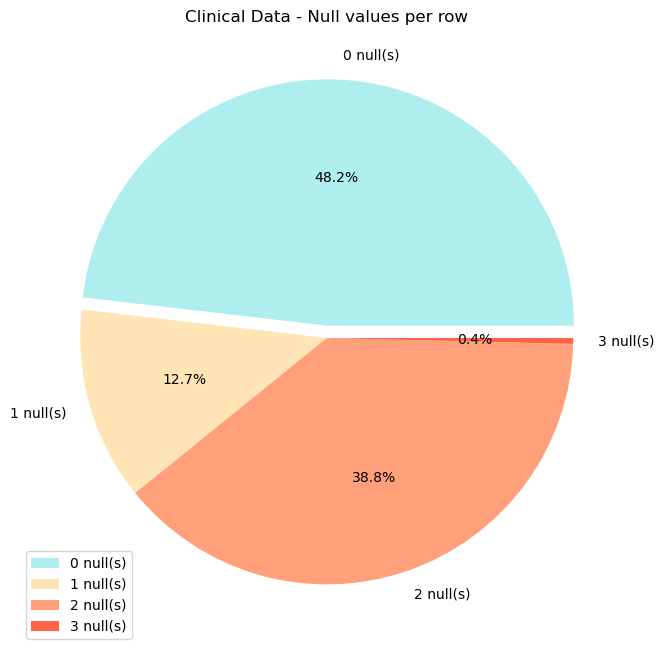

In [13]:
data_clinical_temp = data_clinical
data_clinical_temp['null_values_count'] = data_clinical.isnull().sum(axis=1)

data_clinical_null_per_row = data_clinical_temp['null_values_count'].value_counts()[:-1].reindex([0, 1, 2, 3])
fig = plt.figure(figsize=(8, 8))
plt.pie(
    data_clinical_null_per_row, 
    labels = [str(e) + ' null(s)' for e in data_clinical_null_per_row.index],
    colors = ['PaleTurquoise', 'Moccasin', 'LightSalmon', 'Tomato'],
    explode = [0.05, 0, 0, 0],
    autopct='%1.1f%%'
)
plt.title('Clinical Data - Null values per row')
plt.legend()
plt.show()

**Nhận xét:**
* Dữ liệu có 51.8% dòng có chứa giá trị null, trong đó:
  * 12.7% dòng chứa 1 giá trị null
  * 38.8% dòng chứa 2 giá trị null
  *  0.4% dòng chứa 3 giá trị null

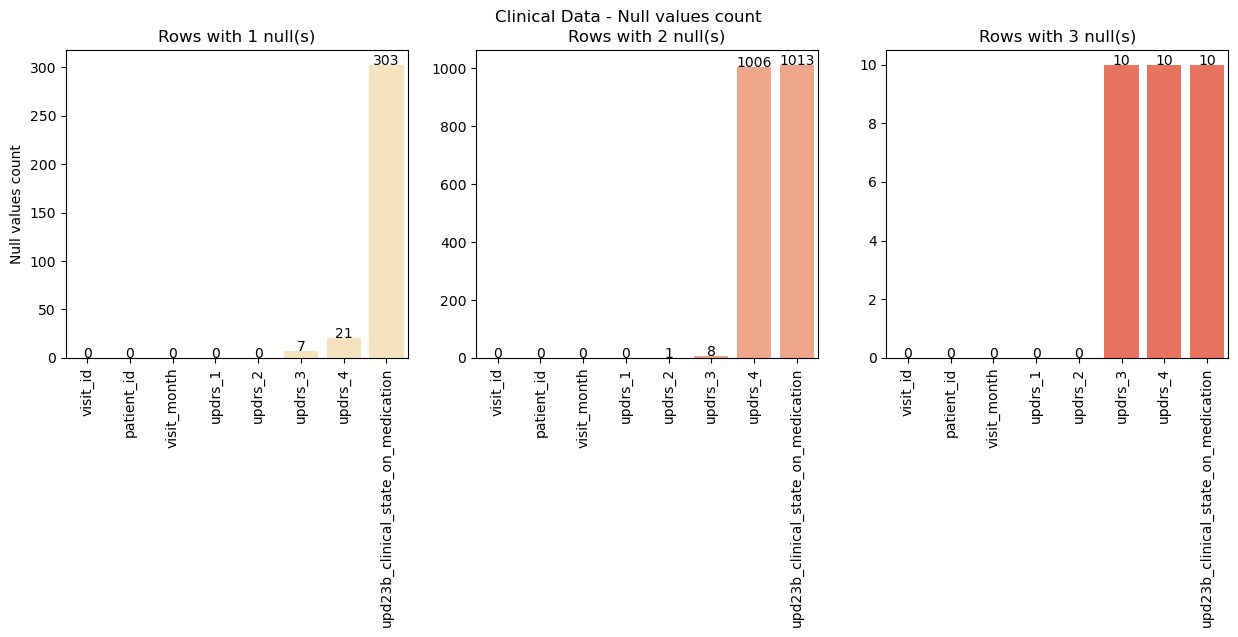

In [14]:
null_count_labels = [data_clinical_temp[(data_clinical_temp['null_values_count'] == x)].isnull().sum().index[:-1] for x in range(1, 6)]
null_count_values = [data_clinical_temp[(data_clinical_temp['null_values_count'] == x)].isnull().sum().values[:-1] for x in range(1, 6)]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
fig.suptitle("Clinical Data - Null values count")

colors = ['Moccasin', 'LightSalmon', 'Tomato']

for i in range(0, 3):
    ax = axs[i]
    labels = null_count_labels[i]
    sns.barplot(x=labels, y=null_count_values[i], ax=ax, color=colors[i])
    ax.set_title(f"Rows with {i + 1} null(s)")
    ax.set_ylabel("Null values count" if i == 0 else "")
    ax.set_xticks([u for u in range(len(labels))], labels, rotation=90)
    for p in ax.patches:
        height = p.get_height()
        ax.text(x=p.get_x()+(p.get_width()/2), y=height, s="{:d}".format(int(height)), ha="center")

**Nhận xét:**
* Với những dòng chứa 1 giá trị `null`, dữ liệu thiếu chủ yếu tập trung vào cột `upd23b_clinical_state_on_medication`
* Với những dòng chứa 2 giá trị `null`, dữ liệu thiếu chủ yếu tập trung vào cột `updrs_4` và `upd23b_clinical_state_on_medication`
* Với những dòng chứa 3 giá trị `null`, dữ liệu thiếu chủ yếu tập trung vào cột `updrs_3`, `updrs_4` và `upd23b_clinical_state_on_medication`

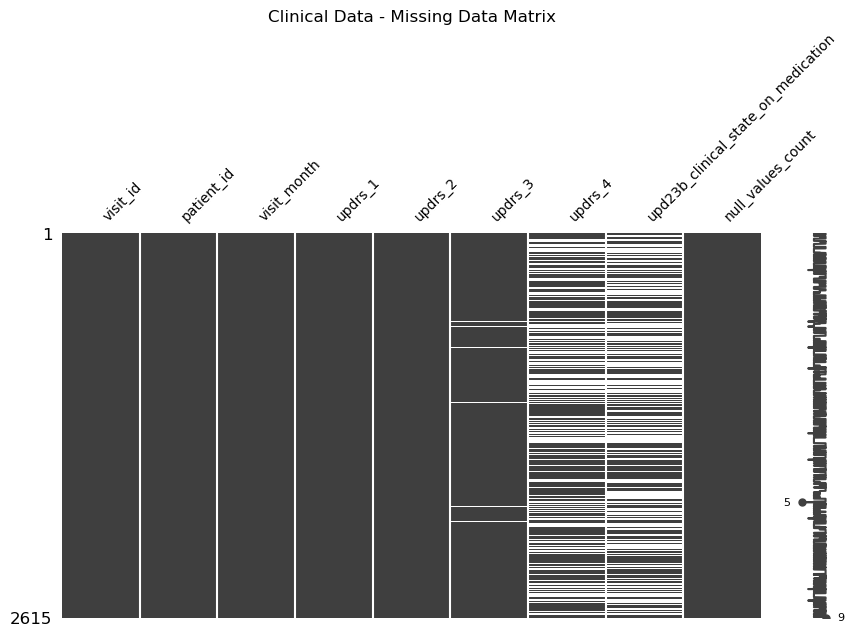

In [15]:
msno.matrix(data_clinical, figsize=(10, 5), fontsize=10)
plt.title('Clinical Data - Missing Data Matrix')
plt.show()

**Nhận xét:**
* Dữ liệu bị thiếu chủ yếu tập trung tại 2 thuộc tính là `updrs_4` và `upd23b_clinical_state_on_medication`
* Dữ liệu bị thiếu tại 2 thuộc tính `updrs_4` và `upd23b_clinical_state_on_medication` *có thể* **có** pattern xuất hiện cùng nhau

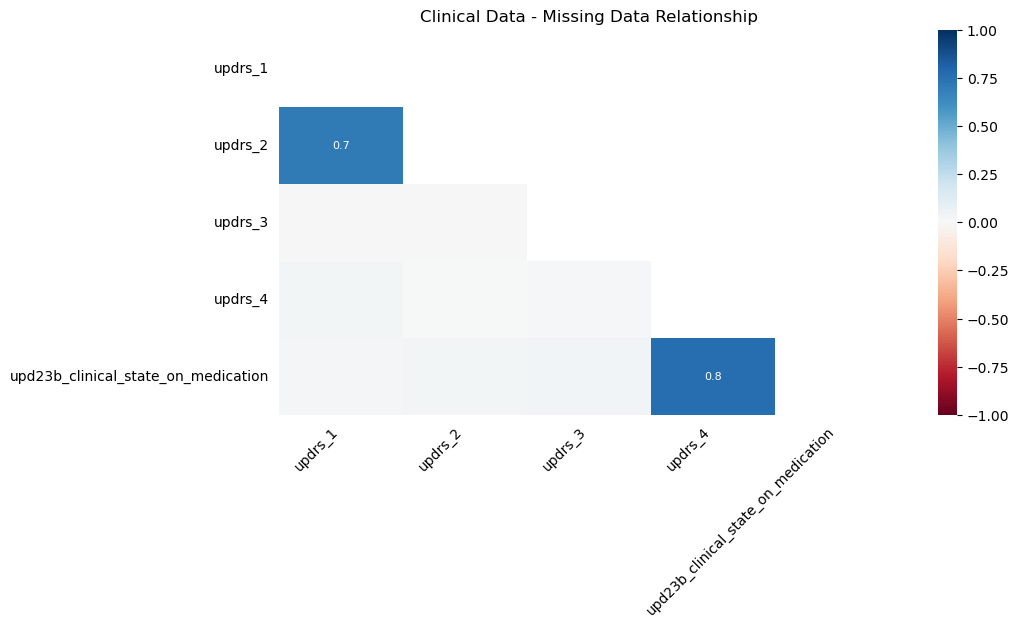

In [16]:
msno.heatmap(data_clinical, figsize=(10, 5), fontsize=10)
plt.title('Clinical Data - Missing Data Relationship')
plt.show()

**Nhận xét:**
* 2 thuộc tính `updrs_4` và `upd23b_clinical_state_on_medication` **có** dữ liệu bị thiếu xuất hiện cùng nhau (Tương quan bị thiếu rất cao, **0.8**)
* Chúng ta sẽ không kết luận 2 thuộc tính `updrs_1` và `updrs_2` có dữ liệu bị thiếu xuất hiện cùng nhau, vì dữ liệu bị thiếu tại 2 thuộc tính này xuất hiện rất ít (chỉ 1 đến 2 mẫu)

## 2.2.1.2. Tập dữ liệu supplemental:

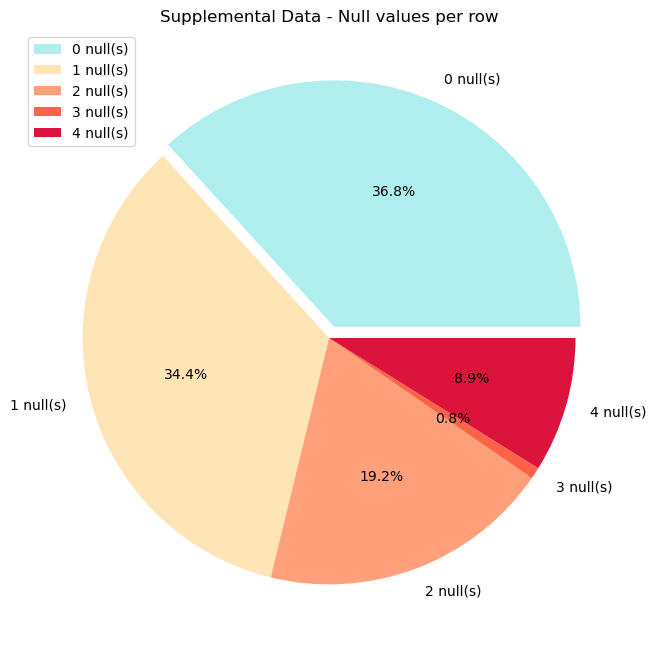

In [17]:
data_supplemental_temp = data_supplemental
data_supplemental_temp['null_values_count'] = data_supplemental.isnull().sum(axis=1)

data_supplemental_null_per_row = data_supplemental_temp['null_values_count'].value_counts()[:-1].reindex([0, 1, 2, 3, 4])
fig = plt.figure(figsize=(8, 8))
plt.pie(
    data_supplemental_null_per_row, 
    labels = [str(e) + ' null(s)' for e in data_supplemental_null_per_row.index],
    colors = ['PaleTurquoise', 'Moccasin', 'LightSalmon', 'Tomato', 'Crimson'],
    explode = [0.05, 0, 0, 0, 0],
    autopct='%1.1f%%'
)
plt.title('Supplemental Data - Null values per row')
plt.legend()
plt.show()

**Nhận xét:**
* Dữ liệu có 63.2% dòng có chứa giá trị null, trong đó:
  * 34.4% dòng chứa 1 giá trị null
  * 19.2% dòng chứa 2 giá trị null
  *  0.8% dòng chứa 3 giá trị null
  *  8.9% dòng chứa 4 giá trị null

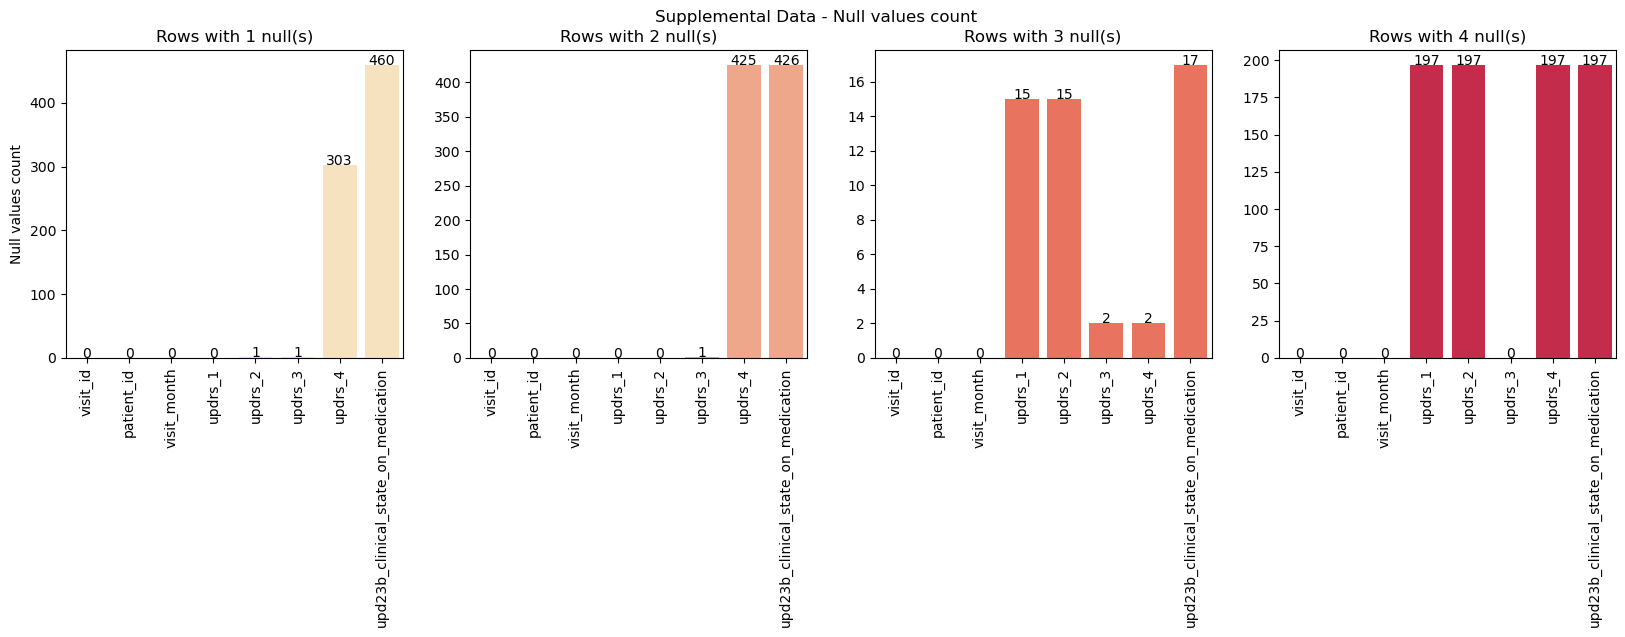

In [18]:
null_count_labels = [data_supplemental_temp[(data_supplemental_temp['null_values_count'] == x)].isnull().sum().index[:-1] for x in range(1, 6)]
null_count_values = [data_supplemental_temp[(data_supplemental_temp['null_values_count'] == x)].isnull().sum().values[:-1] for x in range(1, 6)]

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
fig.suptitle("Supplemental Data - Null values count")

colors = ['Moccasin', 'LightSalmon', 'Tomato', 'Crimson']

for i in range(0, 4):
    ax = axs[i]
    labels = null_count_labels[i]
    sns.barplot(x=labels, y=null_count_values[i], ax=ax, color=colors[i])
    ax.set_title(f"Rows with {i + 1} null(s)")
    ax.set_ylabel("Null values count" if i == 0 else "")
    ax.set_xticks([u for u in range(len(labels))], labels, rotation=90)
    for p in ax.patches:
        height = p.get_height()
        ax.text(x=p.get_x()+(p.get_width()/2), y=height, s="{:d}".format(int(height)), ha="center")

**Nhận xét:**
* Với những dòng chứa 1 giá trị `null`, dữ liệu thiếu chủ yếu tập trung vào cột `upd23b_clinical_state_on_medication`, tiếp sau đó là `updrs_4`
* Với những dòng chứa 2 giá trị `null`, dữ liệu thiếu chủ yếu tập trung vào cột `updrs_4` và `upd23b_clinical_state_on_medication`
* Với những dòng chứa 3 giá trị `null`, dữ liệu thiếu chủ yếu tập trung vào cột `updrs_1`, `updrs_2` và `upd23b_clinical_state_on_medication`
* Với những dòng chứa 4 giá trị `null`, dữ liệu thiếu chủ yếu tập trung vào cột `updrs_1`, `updrs_2`, `updrs_4` và `upd23b_clinical_state_on_medication`

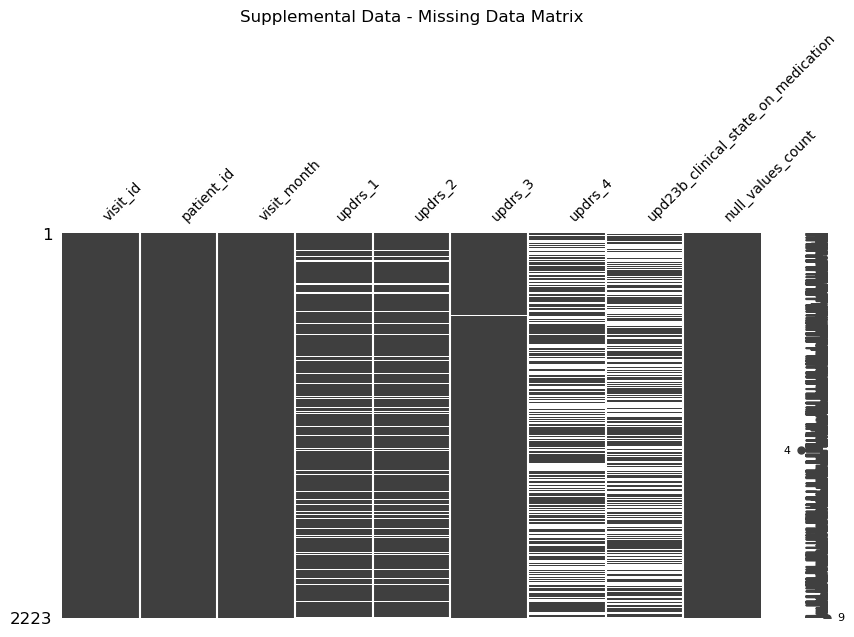

In [19]:
msno.matrix(data_supplemental, figsize=(10, 5), fontsize=10)
plt.title('Supplemental Data - Missing Data Matrix')
plt.show()

**Nhận xét:**
* Dữ liệu bị thiếu chủ yếu tập trung tại 2 thuộc tính là `updrs_4` và `upd23b_clinical_state_on_medication`, tiếp theo đó là 2 thuộc tính `updrs_1` và `updrs_2`.
* Khác với dữ liệu `clinical`, ở dữ liệu `supplemental`, dữ liệu bị thiếu tại 2 thuộc tính `updrs_4` và `upd23b_clinical_state_on_medication` *có vẻ như* **không** có pattern xuất hiện cùng nhau
* Dữ liệu bị thiếu tại 2 thuộc tính `updrs_1` và `updrs_2` *có thể* **có** pattern xuất hiện cùng nhau

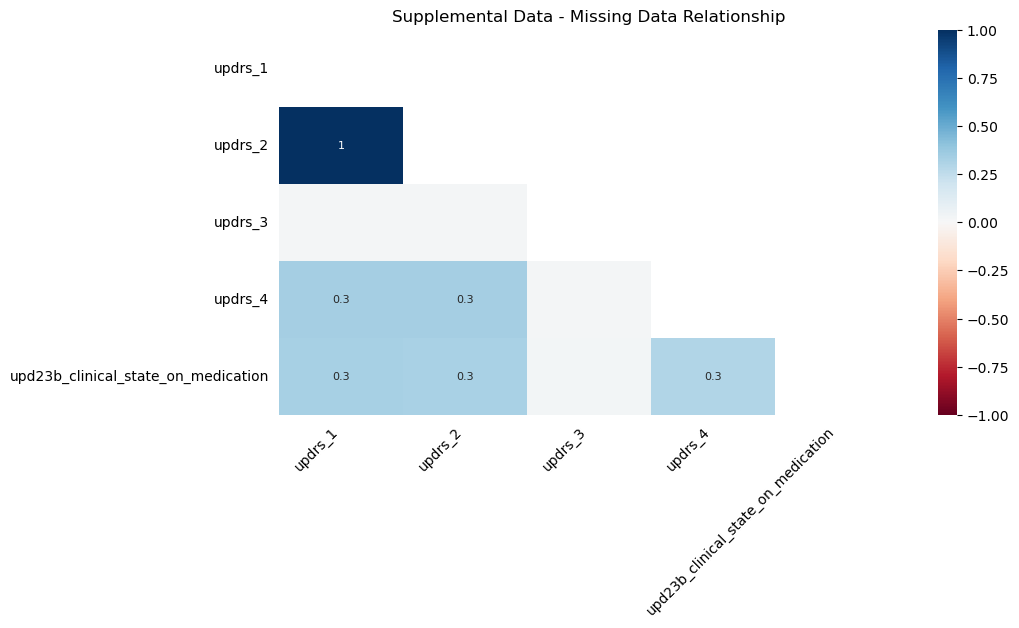

In [20]:
msno.heatmap(data_supplemental, figsize=(10, 5), fontsize=10)
plt.title('Supplemental Data - Missing Data Relationship')
plt.show()

**Nhận xét:**
* 2 thuộc tính `updrs_1` và `updrs_2` **có** dữ liệu bị thiếu xuất hiện cùng nhau (Tương quan bị thiếu tối đa, **1.0**) -> Hễ `updrs_1` thiếu thì `updrs_2` sẽ thiếu
* Các cặp thuộc tính có mối tương quan **thấp** khi bị thiếu dữ liệu:
  * `updrs_1` và `updrs_4`: **0.3**
  * `updrs_1` và `upd23b_clinical_state_on_medication`: **0.3**
  * `updrs_2` và `updrs_4`: **0.3**
  * `updrs_2` và `upd23b_clinical_state_on_medication`: **0.3**
  * `updrs_4` và `upd23b_clinical_state_on_medication`: **0.3**

## 2.2.1.3. Kết luận và hướng giải quyết

**Kết luận chung:**
* Trong 4 tập dữ liệu:
  * 2 tập dữ liệu liên quan đến hàm lượng protein của bệnh nhân là `proteins` và `peptides` **không** chứa giá trị `null`
  * 2 tập dữ liệu liên quan đến điểm đánh giá UPDRS và tình trạng uống thuốc của bệnh nhân là `clinical` và `supplemental` **có** chứa giá trị `null` 
* Tập dữ liệu `clinical`:
  * Có 51.8% dòng dữ liệu có chứa giá trị `null` -> lượng dữ liệu bị thiếu rất lớn
  * Dữ liệu bị thiếu chủ yếu tập trung tại 2 thuộc tính là `updrs_4` và `upd23b_clinical_state_on_medication`
    * Cặp 2 thuộc tính `updrs_4` và `upd23b_clinical_state_on_medication` có tương quan bị thiếu rất cao (**0.8**).
* Tập dữ liệu `supplemental`:
  * Có 63.2% dòng dữ liệu có chứa giá trị `null` -> lượng dữ liệu bị thiếu rất lớn
  * Dữ liệu bị thiếu chủ yếu tập trung tại 2 thuộc tính là `updrs_4` và `upd23b_clinical_state_on_medication`, tiếp theo đó là 2 thuộc tính `updrs_1` và `updrs_2`.
    * Cặp 2 thuộc tính `updrs_4` và `upd23b_clinical_state_on_medication` có tương quan bị thiếu không cao như ở tập dữ liệu `clinical` (**0.3**).
    * Cặp 2 thuộc tính `updrs_1` và `updrs_2` có tương quan bị thiếu rất cao (**1.0**) -> Hễ `updrs_1` thiếu thì `updrs_2` sẽ thiếu

**Phân tích và đề xuất hướng giải quyết:**
* **Đối với dữ liệu UPDRS**, cụ thể gồm `updrs_1`, `updrs_2`, `updrs_3` và `updrs_4`:
  * Các cột này là điểm đánh giá người bệnh thông qua các triệu chứng trong các mục của UPDRS, bao gồm:
    * `updrs_1`: đánh giá tâm trạng và hành vi
    * `updrs_2`: đánh giá các hoạt động thường ngày
    * `updrs_3`: đánh giá các chức năng vận động
    * `updrs_4`: đánh giá các biến chứng của điều trị
  * Quan trọng: Điểm số đánh giá cao hơn cho thấy các triệu chứng tương ứng nghiêm trọng hơn. Và điểm số bằng `0` có nghĩa là người bệnh đã bình thường (giá trị `0` có ý nghĩa). Vì thế mà không thể xem giá trị `null` là giá trị `0` được.
  * Nguyên nhân dẫn đến thiếu dữ liệu (giả thuyết):
    * Quá trình thu thập dữ liệu đã không thu thập được / quên thu thập điểm kiểm tra đánh giá UPDRS ở một số người bệnh.
    * Bệnh nhân không tiến hành kiểm tra đánh giá UPDRS -> không có dữ liệu để thu thập.
    * Người bệnh từ chối cung cấp thông tin kiểm tra đánh giá UPDRS
  * Các hướng giải quyết:
    1. Loại bỏ các dòng chứa giá trị `null` ở các cột đánh giá UPDRS, hoặc
    2. Gán giá trị `null` ở các cột đánh giá UPDRS bằng một giá trị cụ thể, điều kiện là khi nhìn vào giá trị đó, chúng ta có thể biết được rằng giá trị này đã từng là `null`, ví dụ: giá trị `-1`.
* **Đối với dữ liệu của cột `upd23b_clinical_state_on_medication`**:
  * Cột này ghi nhận bệnh nhân có dùng thuốc Levodopa hay không trong quá trình đánh giá và chỉ nhận 1 trong 2 giá trị `On` hoặc `Off`. Giá trị `null` xuất hiện ở cột này **không** chắc chắn là bệnh nhân có dùng thuốc hay không. 
  * Nguyên nhân dẫn đến thiếu dữ liệu (giả thuyết):
    * Quá trình thu thập dữ liệu đã không thu thập được / quên thu thập trạng thái uống thuốc ở một số người bệnh.
    * Người bệnh từ chối cung cấp thông tin uống thuốc.
  * Các hướng giải quyết:
    1. Loại bỏ cột `upd23b_clinical_state_on_medication`, hoặc
    2. Loại bỏ các dòng chứa giá trị `null` ở cột `upd23b_clinical_state_on_medication`, hoặc
    3. Gán giá trị `null` ở cột `upd23b_clinical_state_on_medication` bằng giá trị `Unknown`, có ý nghĩa là không biết được tình trạng uống thuốc của người bệnh. Như vậy, cột `upd23b_clinical_state_on_medication` sẽ có 3 giá trị là `On`, `Off` và `Unknown`.

# 2.2.2 Kiểm tra dữ liệu bị trùng

In [21]:
for i, temp_df in enumerate(data_list):
    print(f'Dataframe "{data_name[i]}" contains {temp_df.duplicated().sum()} duplicated samples.')

Dataframe "data_proteins" contains 0 duplicated samples.
Dataframe "data_peptides" contains 0 duplicated samples.
Dataframe "data_clinical" contains 0 duplicated samples.
Dataframe "data_supplemental" contains 0 duplicated samples.


**Nhận xét:**
* 4 tập dữ liệu bao gồm `proteins`, `peptides`, `clinical` và `supplemental` **không** chứa các mẫu bị lặp.

**Kết luận chung:**
* Dữ liệu không bị trùng lặp.

# 2.2.3 Kiểm tra và xử lý outlier

## 2.2.3.1 Tập dữ liệu data_supplement

In [22]:
data_supplemental.head()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,null_values_count
0,35_0,35,0,5.0,3.0,16.0,0.0,NaN,1
1,35_36,35,36,6.0,4.0,20.0,0.0,NaN,1
2,75_0,75,0,4.0,6.0,26.0,0.0,NaN,1
3,75_36,75,36,1.0,8.0,38.0,0.0,On,0
4,155_0,155,0,NaN,NaN,0.0,NaN,NaN,4


In [23]:
data_supplemental.shape

(2223, 9)

Ta không xét cột visit_id vì đây là cột ghép từ patient_id và visit_month. Nên ta sẽ xem xét 2 cột còn lại thay vì cột này.

**Cột visit_month: tháng khám bệnh**

In [24]:
print(data_supplemental.visit_month.nunique())
data_supplemental.visit_month.unique()

8


array([ 0, 36,  5,  6, 12, 18, 24, 30])

Có 8 mốc thời gian khám bệnh

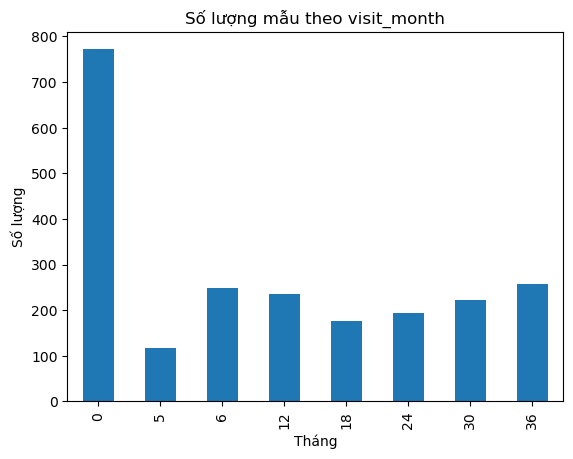

In [25]:
data_supplemental.visit_month.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Tháng')
plt.ylabel('Số lượng')
plt.title('Số lượng mẫu theo visit_month')
plt.show()

Số lượng dữ liệu ở các mốc cũng không có nhiều bất thường, chỉ có mốc 0 là cao hơn hẵn các mốc còn lại. Có thể hiểu rằng vì đây là tháng đầu tiên các bệnh nhân đến khám bệnh. Nên việc nó cao nhất là điều có khả năng xảy ra.

**Cột patient_id: mã bệnh nhân**

In [26]:
data_supplemental.patient_id.nunique()

771

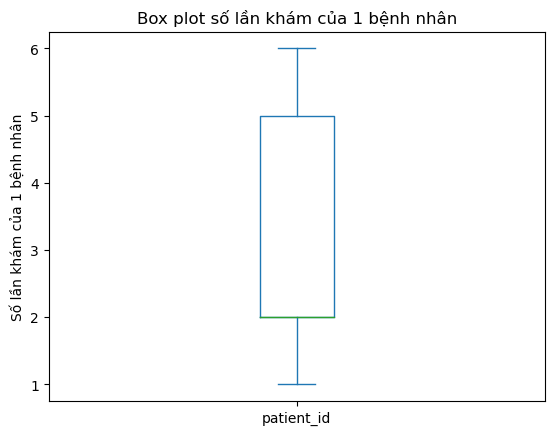

In [27]:
data_supplemental.patient_id.value_counts().plot(kind='box')
plt.ylabel('Số lần khám của 1 bệnh nhân')
plt.title('Box plot số lần khám của 1 bệnh nhân')
plt.show()

**Cột updrs_1: điểm UPDRS Part I - Non-Motor Aspects of Experiences of Daily Living (nM-EDL)**

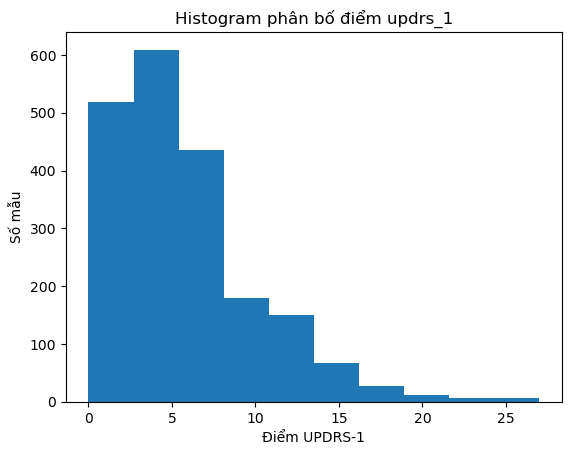

In [28]:
data_supplemental.updrs_1.plot(kind='hist')
plt.xlabel('Điểm UPDRS-1')
plt.ylabel('Số mẫu')
plt.title('Histogram phân bố điểm updrs_1')
plt.show()

Theo bài báo https://www.movementdisorders.org/MDS-Files1/PDFs/Rating-Scales/MDS-UPDRS_Vol23_Issue15_2008.pdf được đính kèm trong mô tả dữ liệu, Part I này sẽ có 13 chỉ tiêu, điểm số mỗi chỉ tiêu là 0 - 4. Nên khoảng giá trị hợp lệ của part 1 là 0 - 52.

Ta thấy toàn bộ giá trị trong dữ liệu đều nằm trong khoảng này.

Ta thấy dữ liệu đang bị lệch phải, và giá trị ở khoảng ~ 25 khá ít. Nên sẽ chuẩn hóa dữ liệu và dùng thống kê để kiểm tra xem đây có phải là outlier hay không.

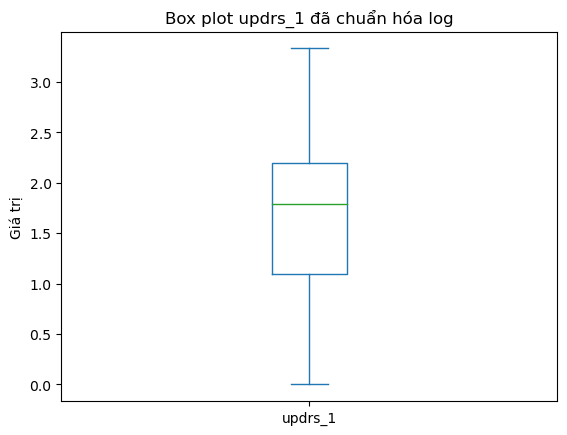

In [29]:
norm = np.log(data_supplemental['updrs_1']+1)
norm.plot(kind='box')
plt.title('Box plot updrs_1 đã chuẩn hóa log')
plt.ylabel('Giá trị')
plt.show()

Ta thấy đây không phải là outlier

**Cột updrs_2: điểm UPDRS Part II - Motor Aspects of Experiences of Daily Living (M-EDL)**

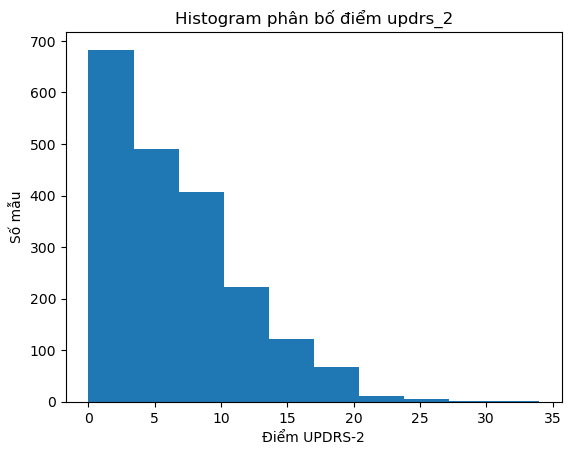

In [30]:
data_supplemental.updrs_2.plot(kind='hist')
plt.xlabel('Điểm UPDRS-2')
plt.ylabel('Số mẫu')
plt.title('Histogram phân bố điểm updrs_2')
plt.show()

Tương tự như trên, Part II có khoảng hợp lệ là 0 - 52 và tất cả giá trị đều nằm trong khoảng này

Tuy nhiên, khoảng giá trị >25 có khá ít mẫu, nên ta sẽ detect outlier như updrs-1

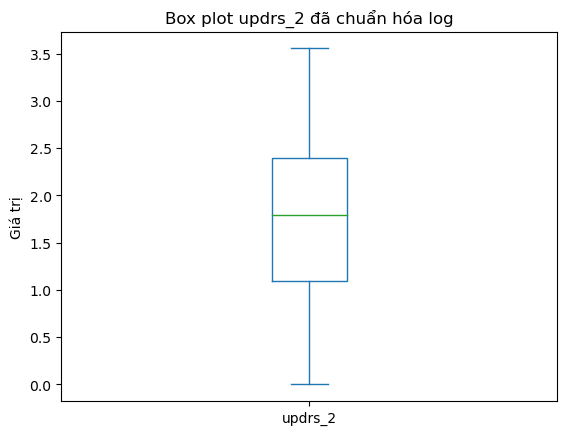

In [31]:
norm = np.log(data_supplemental['updrs_2']+1)
norm.plot(kind='box')
plt.title('Box plot updrs_2 đã chuẩn hóa log')
plt.ylabel('Giá trị')
plt.show()

Ta thấy trong cột này cũng không có outlier

**Cột updrs_3: điểm UPDRS Part III - Motor Examination**

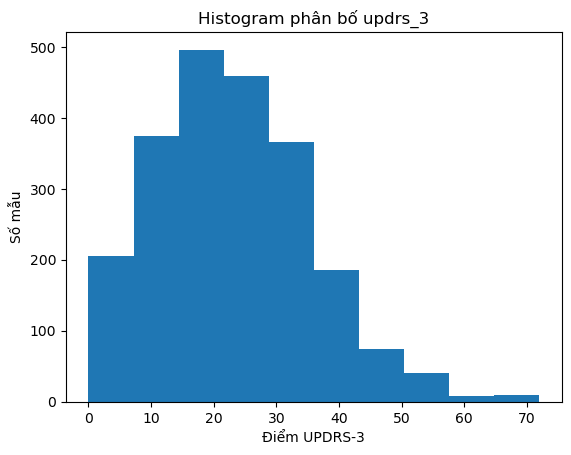

In [32]:
data_supplemental.updrs_3.plot(kind='hist')
plt.xlabel('Điểm UPDRS-3')
plt.ylabel('Số mẫu')
plt.title('Histogram phân bố updrs_3')
plt.show()

Part III có khoảng giá trị từ 0 - 132 (33 chỉ tiêu) và tất cả giá trị đều nằm trong khoảng này.

**Cột updrs_4: điểm UPDRS Part IV -  Motor Complications**

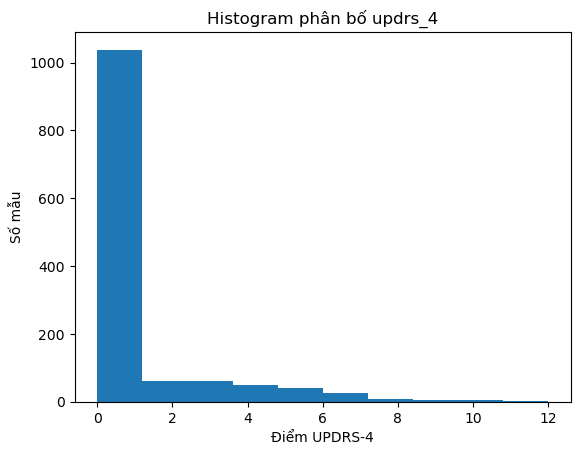

In [33]:
data_supplemental.updrs_4.plot(kind='hist')
plt.xlabel('Điểm UPDRS-4')
plt.ylabel('Số mẫu')
plt.title('Histogram phân bố updrs_4')
plt.show()

Part IV gồm 6 chỉ tiêu. Khoảng điểm là 0 - 24 nên tất cả giá trị trong dữ liệu đều hợp lệ.

Dữ liệu hiện tại đang bị lệch nặng về điểm 0. Và khoảng từ 8 trở lên có khá ít dữ liệu. <br/>
Tuy nhiên thì nó vẫn phù hợp với xu hướng giảm dần của dữ liệu. Dù vậy ta vẫn có thể xem xét bỏ đi để cải thiện kết quả nếu cần thiết.

**Cột upd23b_clinical_state_on_medication**

In [34]:
print(data_clinical.upd23b_clinical_state_on_medication.nunique())
data_clinical.upd23b_clinical_state_on_medication.unique()

2


array([nan, 'On', 'Off'], dtype=object)

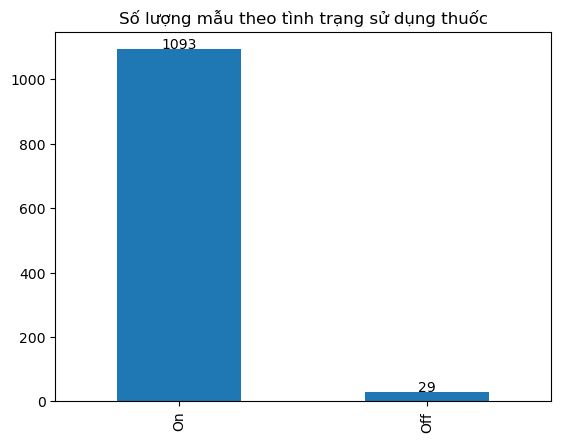

In [35]:
value_count = data_supplemental.upd23b_clinical_state_on_medication\
.value_counts()
value_count.plot(kind='bar')
for i in range(len(value_count.index)):
    plt.text(i, value_count.values[i]+2,str(value_count.values[i]), ha='center')
plt.title('Số lượng mẫu theo tình trạng sử dụng thuốc')
plt.show()

Ta thấy giữa số lượng mẫu On và Off có sự chênh lệch rất lớn, số lượng Off chỉ có 29. Hơn nữa cột này đang bị thiếu gần 50% dữ liệu nên ta có thể xem xét bỏ cột này ở các bước sau.

## 2.2.3.2 Tập dữ liệu data_clinical

In [36]:
data_clinical.head()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,null_values_count
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN,2
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN,2
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN,2
3,55_9,55,9,8.0,9.0,30.0,0.0,On,0
4,55_12,55,12,10.0,10.0,41.0,0.0,On,0


In [37]:
data_clinical.shape

(2615, 9)

Ta không xét cột visit_id vì đây là cột ghép từ patient_id và visit_month. Nên ta sẽ xem xét 2 cột còn lại thay vì cột này.

**Cột visit_month: tháng khám bệnh**

In [38]:
print(data_clinical.visit_month.nunique())
data_clinical.visit_month.unique()

17


array([  0,   3,   6,   9,  12,  18,  24,  30,  36,  42,  48,  54,  60,
        72,  84,  96, 108])

[]

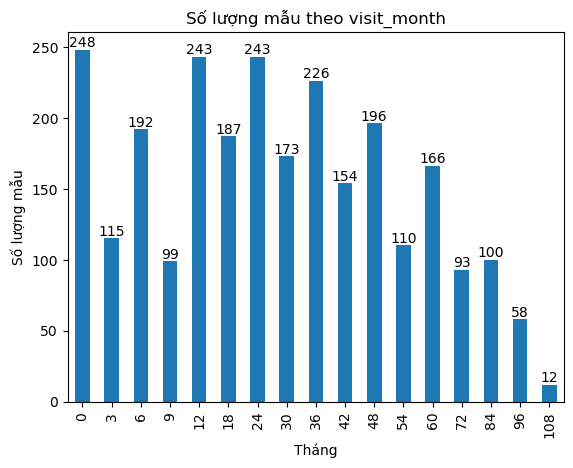

In [39]:
month_count = data_clinical.visit_month.value_counts().sort_index()
for i in range(len(month_count.index)):
    plt.text(i, month_count.values[i]+2,str(month_count.values[i]), ha='center')
month_count.plot(kind='bar')
plt.title('Số lượng mẫu theo visit_month')
plt.xlabel('Tháng')
plt.ylabel('Số lượng mẫu')
plt.plot()

Ta thấy cột này không có gì bất thường, hầu hết các mốc thời gian đều có số lượng mẫu đủ lớn. Mốc cuối cùng tuy có số lượng chỉ 12 mẫu, nhưng đây là một mốc rất xa (108 tháng) so với lần khám đầu nên sẽ có ít mẫu hơn và phù hợp với xu hướng giảm dần theo các mốc.

**Cột patient_id: mã bệnh nhân**

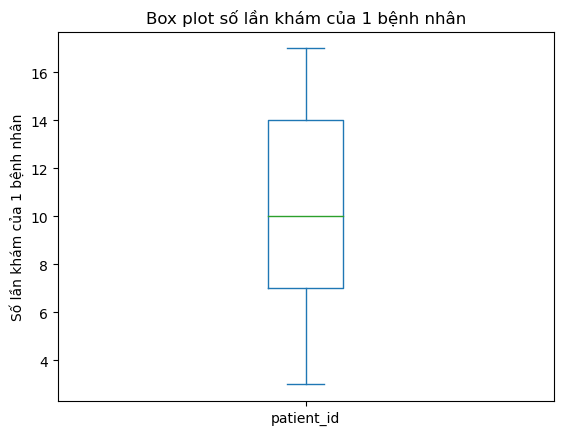

In [40]:
data_clinical.patient_id.value_counts().plot(kind='box')
plt.ylabel('Số lần khám của 1 bệnh nhân')
plt.title('Box plot số lần khám của 1 bệnh nhân')
plt.show()

Ở đây ta sẽ chú ý đến 2 số min và max. Ta thấy rằng trong dữ liệu, 1 bệnh nhân ít nhất khám tại 3 mốc tháng khác nhau và nhiều nhất là 17 mốc khám. Điều này hoàn toàn phù hợp với mô tả dữ liệu (1 mốc tháng sẽ chỉ lấy duy nhất 1 kết quả, và dữ liệu của ta có 17 mốc tháng). Vậy cột này cũng không có outlier 

**Cột updrs_1: điểm UPDRS Part I - Non-Motor Aspects of Experiences of Daily Living (nM-EDL)**

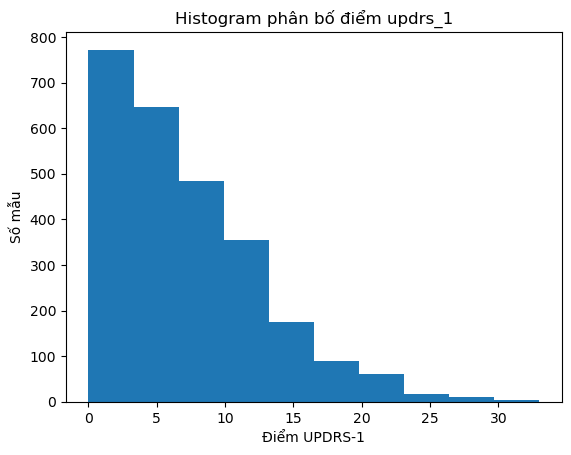

In [41]:
data_clinical.updrs_1.plot(kind='hist')
plt.xlabel('Điểm UPDRS-1')
plt.ylabel('Số mẫu')
plt.title('Histogram phân bố điểm updrs_1')
plt.show()

Khoảng giá trị hợp lệ của part 1 là 0 - 52. Ta thấy toàn bộ giá trị trong dữ liệu đều nằm trong khoảng này.

Tuy nhiên điểm ~30 có số lượng rất ít nên ta sẽ xem xét bằng thống kê

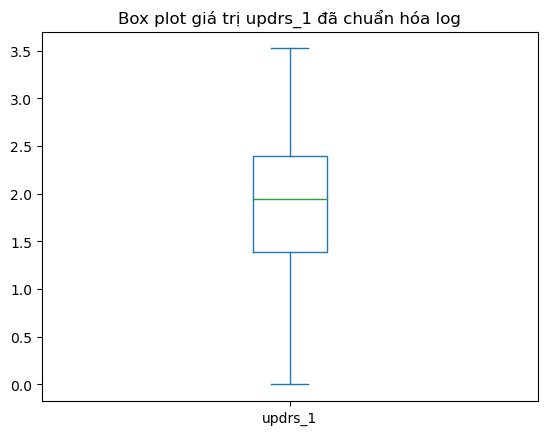

In [42]:
norm = np.log(data_clinical['updrs_1']+1)
norm.plot(kind='box')
plt.title('Box plot giá trị updrs_1 đã chuẩn hóa log')
plt.show()

Ta thấy dữ liệu không có bất thường

**Cột updrs_2: điểm UPDRS Part II - Motor Aspects of Experiences of Daily Living (M-EDL)**

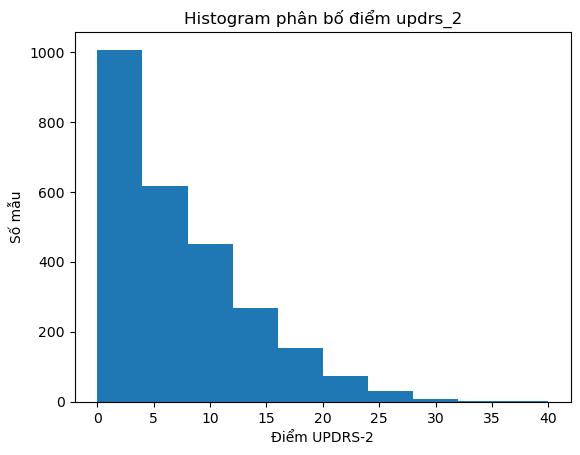

In [43]:
data_clinical.updrs_2.plot(kind='hist')
plt.xlabel('Điểm UPDRS-2')
plt.ylabel('Số mẫu')
plt.title('Histogram phân bố điểm updrs_2')
plt.show()

Tương tự như trên, Part II có khoảng hợp lệ là 0 - 52 và tất cả giá trị đều nằm trong khoảng này. Và khoảng điểm > 30 số lượng rất ít, tuy nhiên thì nó phù hợp với xu hướng giảm dần của dữ liệu. Dù vậy, ta có thể xem xét bỏ những điểm này đi để cải thiện kết quả.

**Cột updrs_3: điểm UPDRS Part III - Motor Examination**

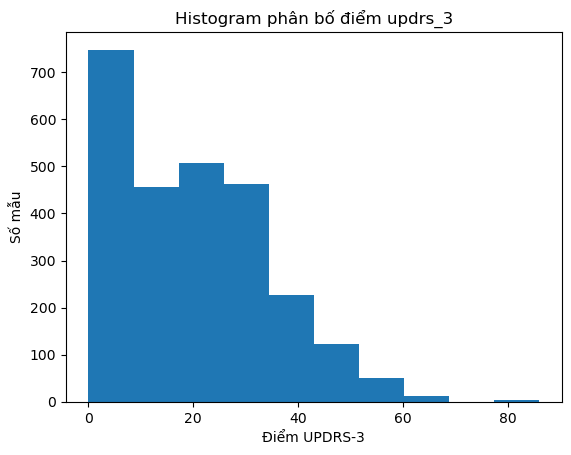

In [44]:
data_clinical.updrs_3.plot(kind='hist')
plt.xlabel('Điểm UPDRS-3')
plt.ylabel('Số mẫu')
plt.title('Histogram phân bố điểm updrs_3')
plt.show()

Part III có khoảng giá trị từ 0 - 132 (33 chỉ tiêu) và tất cả giá trị đều nằm trong khoảng này. Tuy nhiên ta thấy điểm > 75 nằm tách biệt với phần còn lại. Nên ta có thể xem xét bỏ các điểm này ở các bước sau.

**Cột updrs_4: điểm UPDRS Part IV -  Motor Complications**

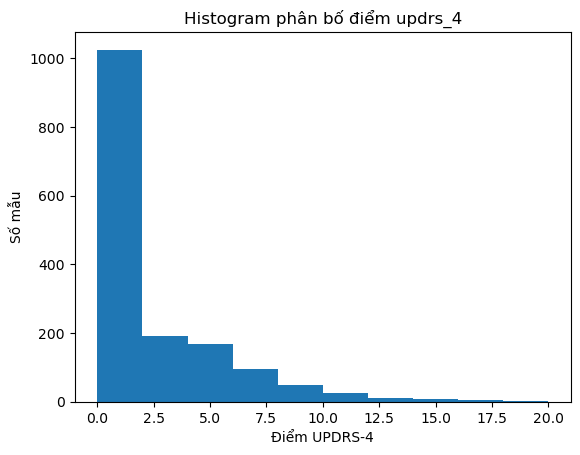

In [45]:
data_clinical.updrs_4.plot(kind='hist')
plt.xlabel('Điểm UPDRS-4')
plt.ylabel('Số mẫu')
plt.title('Histogram phân bố điểm updrs_4')
plt.show()

Part IV gồm 6 chỉ tiêu. Khoảng điểm là 0 - 24 nên tất cả giá trị trong dữ liệu đều hợp lệ. Và tương tự như ở file supplemental, ta cũng có thể xem xét bỏ đi các điểm > 17.5 để cải thiện kết quả. 

**Cột upd23b_clinical_state_on_medication**

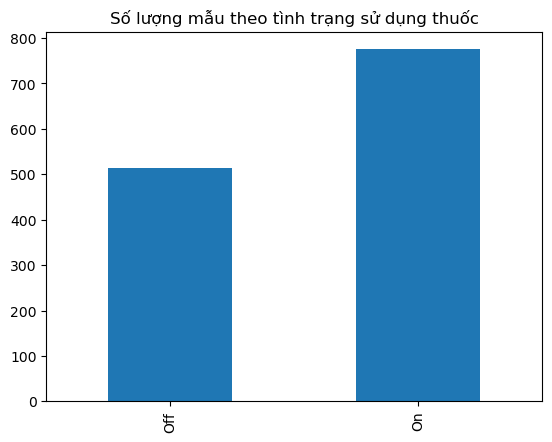

In [46]:
data_clinical.upd23b_clinical_state_on_medication\
.value_counts().sort_values().plot(kind='bar')
plt.title('Số lượng mẫu theo tình trạng sử dụng thuốc')
plt.show()

Ta thấy 2 lớp On và Off không chênh lệch nhau quá nhiều. Nên cột này không có outlier

## 2.2.3.2 Tập dữ liệu data_peptides

In [47]:
data_peptides.head()

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.3
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.0
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.0
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.7


In [48]:
data_peptides.shape

(981834, 6)

Theo mô tả của dữ liệu, ta có sự ràng buộc ở data_clinical và data_peptides rằng tất cả bệnh nhân và tháng thăm khám của data_peptides phải tồn tại trong data_clinical. Nên nếu có điểm nào nằm ngoài clinical, đó sẽ là điểm cần loại bỏ.

**Cột patient_id**

In [49]:
not_in = data_peptides[~data_peptides.patient_id.isin(data_clinical.patient_id)]
print('Số mẫu không thỏa ràng buộc ở patient_id:', not_in.shape[0])

Số mẫu không thỏa ràng buộc ở patient_id: 0


**Cột visit_month**

In [50]:
not_in = data_peptides[~data_peptides.visit_month.isin(data_clinical.visit_month)]
print('Số mẫu không thỏa ràng buộc ở visit_month:', not_in.shape[0])

Số mẫu không thỏa ràng buộc ở visit_month: 0


Ta thấy cả 2 cột đều thỏa điều kiện trên.

**Cột UniProt**

In [51]:
data_peptides.UniProt.nunique()

227

In [52]:
data_peptides.UniProt.value_counts().describe()

count      227.000000
mean      4325.259912
std       6446.449146
min        489.000000
25%       1010.000000
50%       2008.000000
75%       5031.000000
max      51916.000000
Name: UniProt, dtype: float64

Dữ liệu có nhiều UniProt khác nhau, tuy nhiên UniProt có số lần xuất hiện thấp nhất cũng có đến 489 mẫu, nên cột này hầu như không có outlier


**Cột peptide**

In [53]:
data_peptides.Peptide.nunique()

968

In [54]:
data_peptides.Peptide.value_counts().describe()

count     968.000000
mean     1014.291322
std       117.042625
min       489.000000
25%       977.750000
50%      1062.000000
75%      1097.000000
max      1113.000000
Name: Peptide, dtype: float64

Tương tự, cột này cũng hầu như không có outlier

**Cột PeptideAbundance**

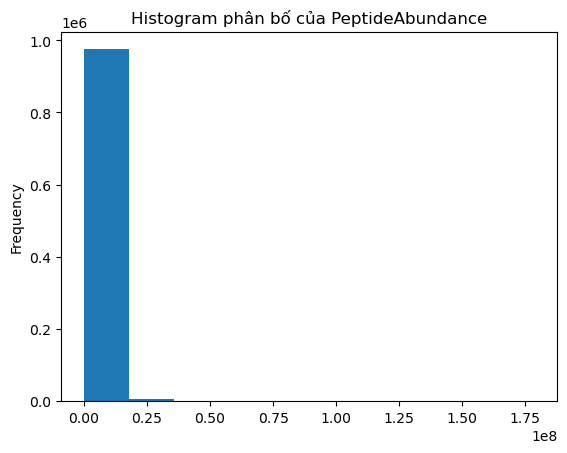

In [55]:
data_peptides.PeptideAbundance.plot(kind='hist')
plt.title('Histogram phân bố của PeptideAbundance')
plt.show()

Dữ liệu đang bị lệch nặng về khoảng 0-0.25xe8. Nên ta sẽ chuẩn hóa và quan sát thống kê của dữ liệu

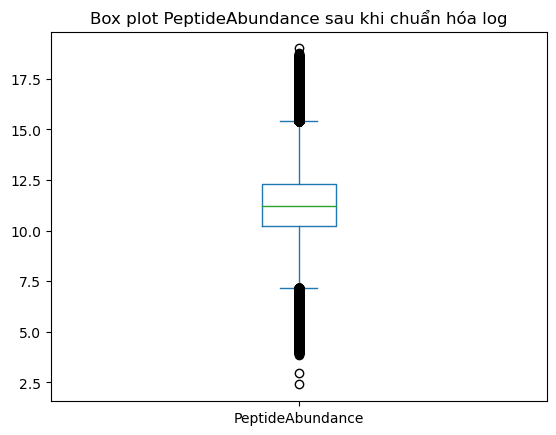

In [56]:
norm = np.log(data_peptides.PeptideAbundance)
norm.plot(kind='box')
plt.title('Box plot PeptideAbundance sau khi chuẩn hóa log')
plt.show()

Quan sát dữ liệu sau khi chuẩn hóa, ta thấy có nhiều điểm được detect là outlier. Tuy nhiên hầu hết các điểm đều xuất hiện khá gần nhau và dày đặc. Chỉ có 2 điểm phía dưới cùng là cách xa phần còn lại. Nên ta có thể xem xét bỏ 2 điểm này đi ở các bước sau.

In [57]:
data_peptides.iloc[norm[norm<3].index]

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
126128,49683_0,0,49683,P02774,RTHLPEVFLSK,10.9985
456992,4923_24,24,4923,P02774,RTHLPEVFLSK,19.7057


Đây là 2 điểm cần được xem xét

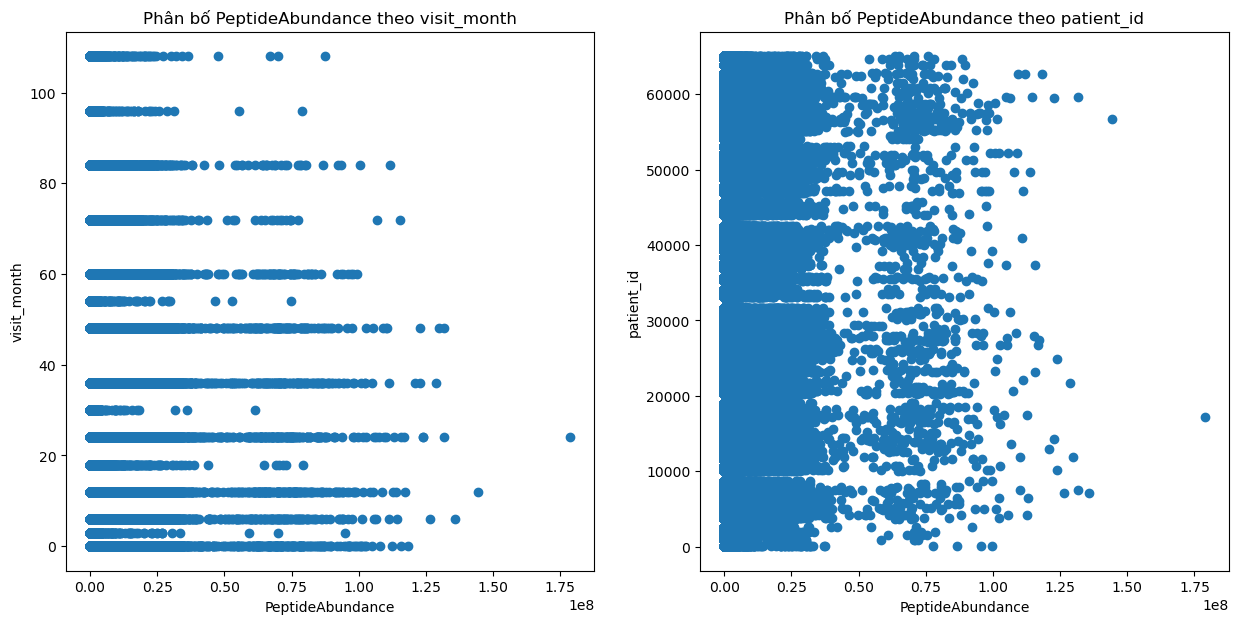

In [58]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title('Phân bố PeptideAbundance theo visit_month')
plt.scatter('PeptideAbundance', 'visit_month', data=data_peptides)
plt.xlabel('PeptideAbundance')
plt.ylabel('visit_month')

plt.subplot(1,2,2)
plt.title('Phân bố PeptideAbundance theo patient_id')
plt.scatter('PeptideAbundance', 'patient_id', data=data_peptides)
plt.xlabel('PeptideAbundance')
plt.ylabel('patient_id')
plt.show()

Quan sát PeptideAbundance theo tháng và bệnh nhân, ta thấy có 1 điểm giá trị 1.75xe8 nằm tách biệt hoàn toàn so với phần còn lại, nên ta có thể xem xét điểm này ở các bước sau.

## 2.2.3.4 Tập dữ liệu data_proteins

In [59]:
data_proteins.head()

,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0
2,55_0,0,55,O00584,39585.8
3,55_0,0,55,O14498,41526.9
4,55_0,0,55,O14773,31238.0


Patient_id và visit_month ở file này cũng có ràng buộc với data_clinical như trên

**Cột patient_id**

In [60]:
not_in = data_proteins[~data_proteins.patient_id.isin(data_clinical.patient_id)]
print('Số mẫu không thỏa ràng buộc ở patient_id:', not_in.shape[0])

Số mẫu không thỏa ràng buộc ở patient_id: 0


**Cột visit_month**

In [61]:
not_in = data_proteins[~data_proteins.visit_month.isin(data_clinical.visit_month)]
print('Số mẫu không thỏa ràng buộc ở visit_month:', not_in.shape[0])

Số mẫu không thỏa ràng buộc ở visit_month: 0


Ta thấy cả 2 đều thỏa ràng buộc

**Cột UniProt**

In [62]:
data_proteins.UniProt.nunique()

227

In [63]:
data_proteins.UniProt.value_counts().describe()

count     227.000000
mean     1025.290749
std       135.788240
min       489.000000
25%       974.500000
50%      1100.000000
75%      1112.000000
max      1113.000000
Name: UniProt, dtype: float64

Tương tự như UniProt ở data_peptides, tần suất xuất hiện của UniProt thấp nhất đã là 489. Nên cột này khả năng cao không có outlier

**Cột NPX**

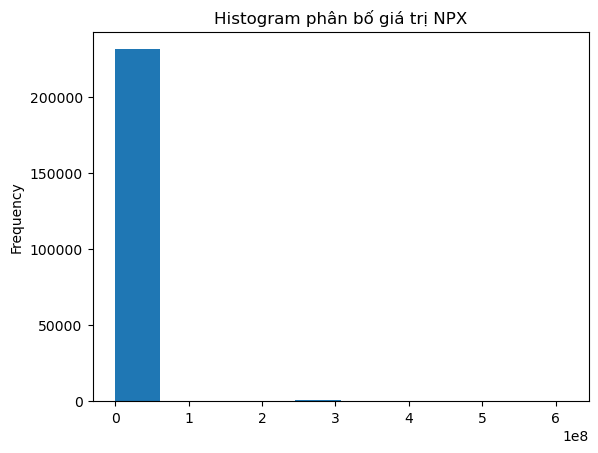

In [64]:
data_proteins.NPX.plot(kind='hist')
plt.title('Histogram phân bố giá trị NPX')
plt.show()

Cột này bị lệch phải nặng, tập trung chủ yếu ở khoảng 0-0.5xe8

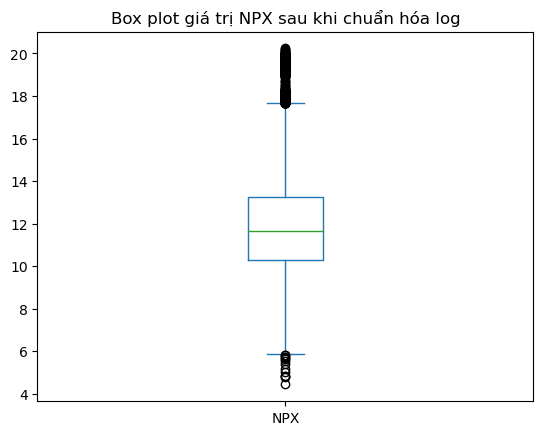

In [65]:
np.log(data_proteins.NPX).plot(kind='box')
plt.title('Box plot giá trị NPX sau khi chuẩn hóa log')
plt.show()

Sau khi chuẩn hóa, ta thấy box plot giúp detect rất nhiều điểm là outlier. Nhưng các điểm này lại nằm khá gần nhau, gần khoảng tập trung của dữ liệu và tần suất cũng rất dày đặc. Nên ta sẽ không xem đây là outlier

# 2.3 Khám phá dữ liệu 🧬

# 2.3.1 Phân tích các chỉ số thống kê và phân phối 📊

Phân tích tập dữ liệu ! Kiểm tra có bao nhiêu bệnh nhân thực trong tập dữ liệu 

In [66]:
data_peptides['patient_id'].nunique()

248

NHẬN XÉT: 
- Có 248 bệnh nhân khác nhau trong tập dữ liệu 

##### TẬP TRAIN_PEPTIDES

In [67]:
data_peptides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981834 entries, 0 to 981833
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   visit_id          981834 non-null  object 
 1   visit_month       981834 non-null  int64  
 2   patient_id        981834 non-null  int64  
 3   UniProt           981834 non-null  object 
 4   Peptide           981834 non-null  object 
 5   PeptideAbundance  981834 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 44.9+ MB


In [68]:
data_peptides.describe()

,visit_month,patient_id,PeptideAbundance
count,981834.000000,981834.000000,9.818340e+05
mean,26.105061,32603.465361,6.428902e+05
std,22.913897,18605.934422,3.377989e+06
min,0.000000,55.000000,1.099850e+01
25%,6.000000,16566.000000,2.817425e+04
50%,24.000000,29313.000000,7.430830e+04
75%,48.000000,49995.000000,2.213388e+05
max,108.000000,65043.000000,1.787520e+08


##### TẬP_PROTEINS

In [69]:
data_proteins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232741 entries, 0 to 232740
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   visit_id     232741 non-null  object 
 1   visit_month  232741 non-null  int64  
 2   patient_id   232741 non-null  int64  
 3   UniProt      232741 non-null  object 
 4   NPX          232741 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 8.9+ MB


In [70]:
data_proteins.describe()

,visit_month,patient_id,NPX
count,232741.000000,232741.000000,2.327410e+05
mean,26.099205,32593.881873,2.712077e+06
std,22.874719,18608.479506,2.224155e+07
min,0.000000,55.000000,8.460820e+01
25%,6.000000,16566.000000,2.946440e+04
50%,24.000000,29313.000000,1.135560e+05
75%,48.000000,49995.000000,5.638940e+05
max,108.000000,65043.000000,6.138510e+08


##### TẬP CLINICAL

In [71]:
data_clinical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2615 entries, 0 to 2614
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   visit_id                             2615 non-null   object 
 1   patient_id                           2615 non-null   int64  
 2   visit_month                          2615 non-null   int64  
 3   updrs_1                              2614 non-null   float64
 4   updrs_2                              2613 non-null   float64
 5   updrs_3                              2590 non-null   float64
 6   updrs_4                              1577 non-null   float64
 7   upd23b_clinical_state_on_medication  1288 non-null   object 
 8   null_values_count                    2615 non-null   int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 184.0+ KB


In [72]:
data_clinical.describe()

,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,null_values_count
count,2615.000000,2615.000000,2614.000000,2613.00000,2590.000000,1577.000000,2615.000000
mean,32651.743786,31.190822,7.110559,6.74359,19.421236,1.861763,0.915105
std,18535.758700,25.199053,5.525955,6.32323,15.000289,3.022112,0.938661
min,55.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,16574.000000,10.500000,3.000000,1.00000,6.000000,0.000000,0.000000
50%,29417.000000,24.000000,6.000000,5.00000,19.000000,0.000000,1.000000
75%,50611.000000,48.000000,10.000000,10.00000,29.000000,3.000000,2.000000
max,65043.000000,108.000000,33.000000,40.00000,86.000000,20.000000,4.000000


##### TẬP SUPPLEMENTAL

In [73]:
data_supplemental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   visit_id                             2223 non-null   object 
 1   patient_id                           2223 non-null   int64  
 2   visit_month                          2223 non-null   int64  
 3   updrs_1                              2010 non-null   float64
 4   updrs_2                              2009 non-null   float64
 5   updrs_3                              2218 non-null   float64
 6   updrs_4                              1295 non-null   float64
 7   upd23b_clinical_state_on_medication  1122 non-null   object 
 8   null_values_count                    2223 non-null   int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 156.4+ KB


In [74]:
data_supplemental.describe()

,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,null_values_count
count,2223.000000,2223.000000,2010.000000,2009.000000,2218.000000,1295.000000,2223.000000
mean,32478.016194,12.910481,5.684080,6.507715,22.917944,0.840154,1.107063
std,18637.562796,13.060532,4.366964,4.968132,12.342596,1.860247,1.176296
min,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16703.000000,0.000000,2.000000,2.000000,14.000000,0.000000,0.000000
50%,32915.000000,6.000000,5.000000,5.000000,22.000000,0.000000,1.000000
75%,47243.000000,24.000000,8.000000,10.000000,31.000000,0.000000,2.000000
max,65530.000000,36.000000,27.000000,34.000000,72.000000,12.000000,5.000000


#### TRỰC QUAN HÓA MỘT SỐ THUỘC TÍNH

<AxesSubplot:xlabel='updrs_4'>

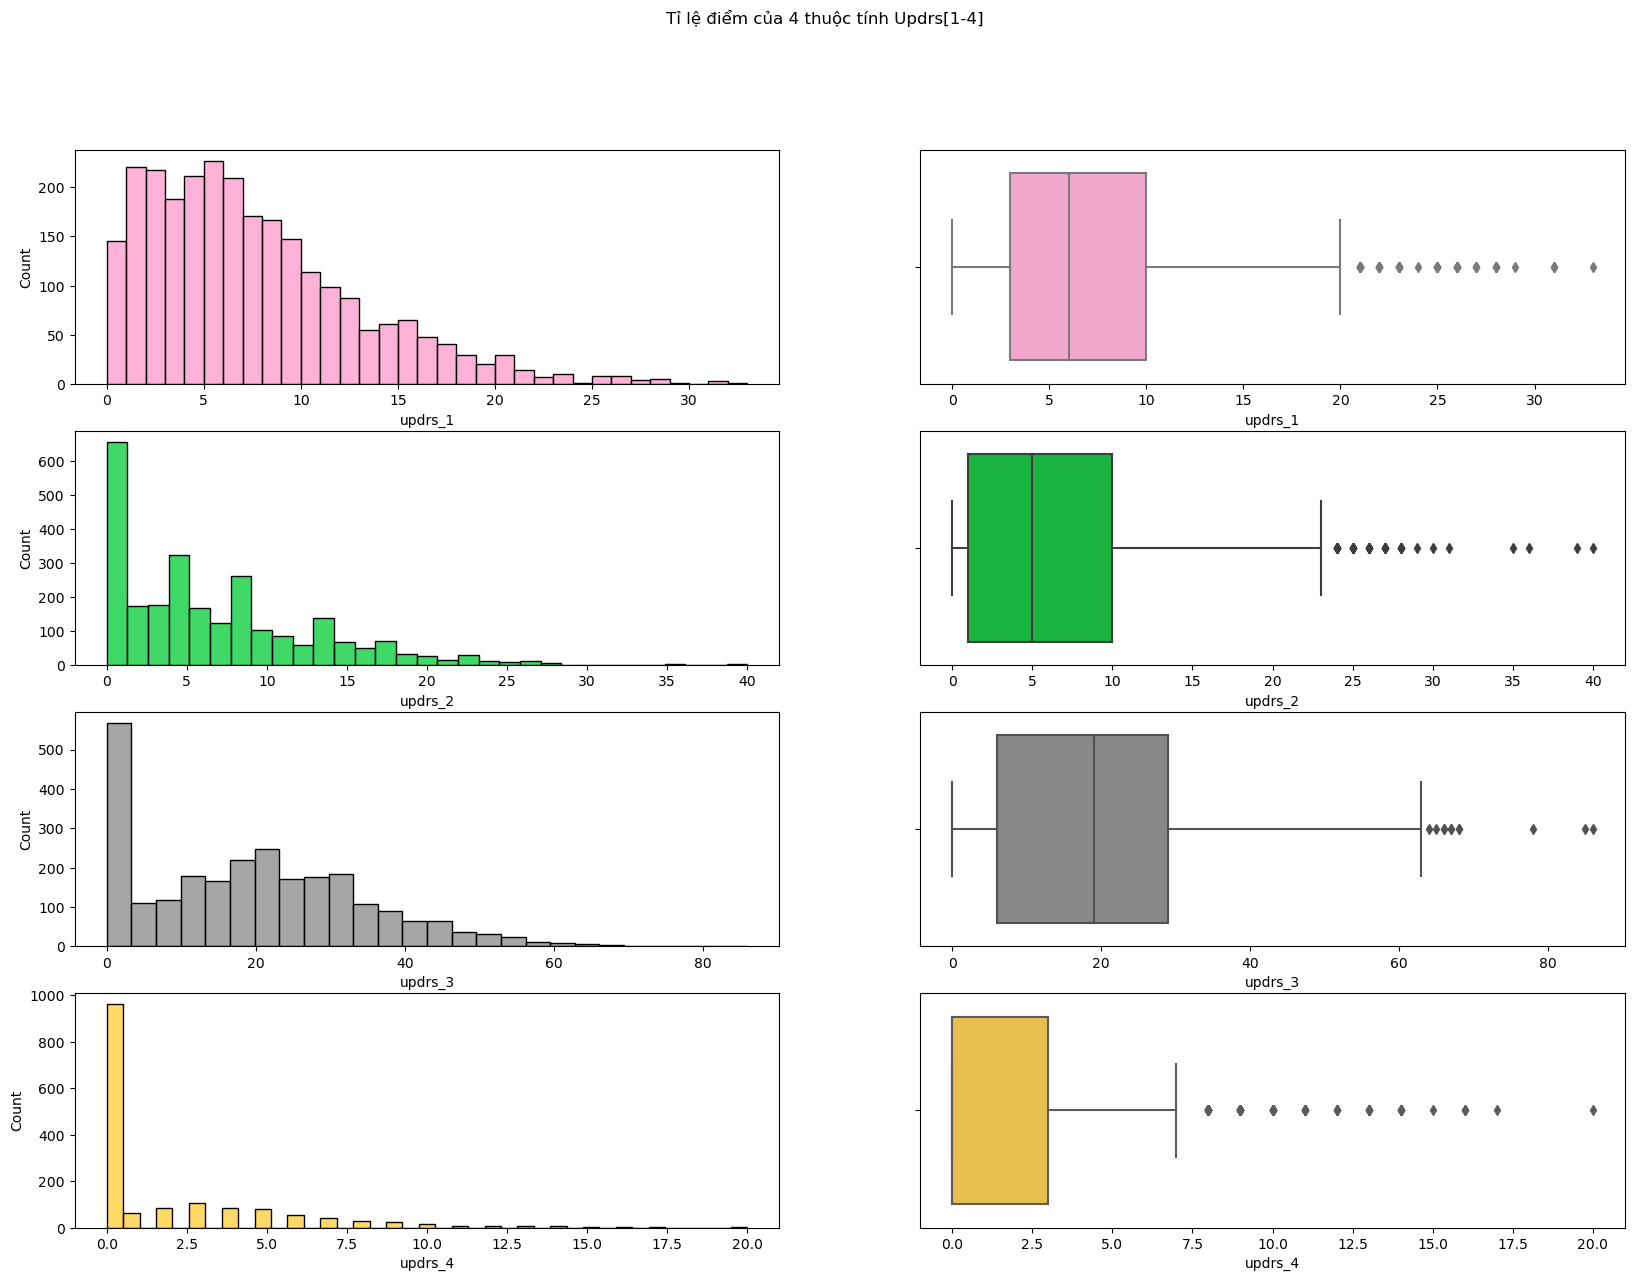

In [75]:
fig, axes = plt.subplots(4,2 , figsize=(20, 14))
 
fig.suptitle('Tỉ lệ điểm của 4 thuộc tính Updrs[1-4]')


sns.histplot(ax=axes[0, 0],data=data_clinical, x="updrs_1",color = "#FF99CC")
sns.boxplot(ax=axes[0,1],x=data_clinical["updrs_1"],color = "#FF99CC")

sns.histplot(ax=axes[1, 0],data=data_clinical, x="updrs_2",color = "#00CC33")
sns.boxplot(ax=axes[1, 1],x=data_clinical["updrs_2"],color = "#00CC33")

sns.histplot(ax=axes[2, 0],data=data_clinical, x="updrs_3",color = "#888888")
sns.boxplot(ax=axes[2,1],x=data_clinical["updrs_3"],color = "#888888")

sns.histplot(ax=axes[3, 0],data=data_clinical, x="updrs_4",color = "#FFCC33")
sns.boxplot(ax=axes[3,1],x=data_clinical["updrs_4"],color = "#FFCC33")

#### NHẬN XÉT
- Các chỉ số updrs[1-4] : quan trọng trong việc đánh giá bệnh , các biểu đồ trực quan giá trị điểm của các updrs[1-4] cho thấy mức độ phân bố của các điểm này - điều này là tiền đề để xây dựng mô hình cho ra tri thức 
- Đối với chỉ số updrs_1 : Điểm của dữ liệu tập trung chủ yếu ở khoảng từ [0-15]
- Đối với chỉ số updrs_2 : Điểm của dữ liệu tập trung chủ yếu ở khoảng từ [0-10] và cao nhất ở 0
- Đối với chỉ số updrs_3 : Điểm của dữ liệu tập trung chủ yếu ở khoảng từ [0-40] và cao nhất ở 0
- Đối với chỉ số updrs_4 : Điểm của dữ liệu khá thưa thớt, tập trung nhiều ở khoảng từ [0-1] và cao nhất ở 0 và có khá nhiều dữ liệu ngoại lệ

##### Kiểm tra tỉ lệ người dùng thuốc

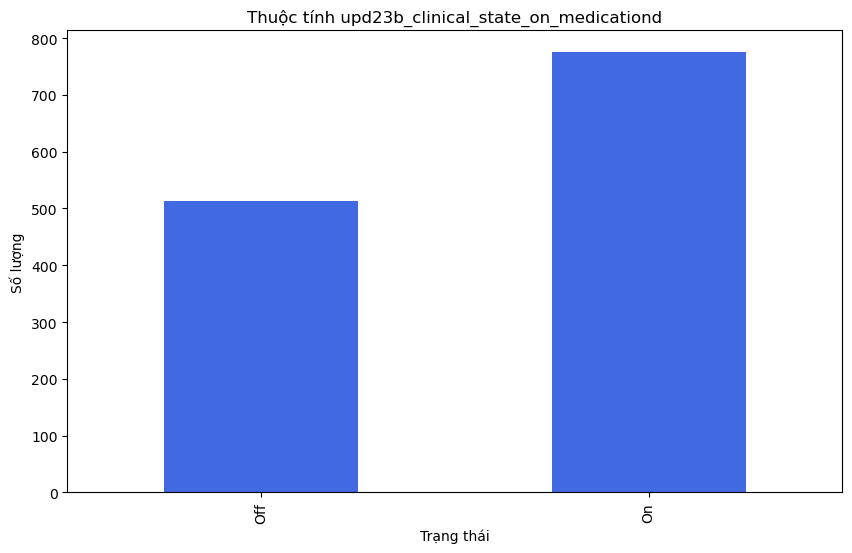

In [76]:
plt.figure(figsize=(10,6))
plt.xlabel('Trạng thái') 
plt.ylabel('Số lượng') 
  
# displaying the title
plt.title("Thuộc tính upd23b_clinical_state_on_medicationd")
data_clinical['upd23b_clinical_state_on_medication'].value_counts().sort_values().plot(kind = 'bar',color='#4169E1');

#### Nhận xét 
Như vậy có thể thấy ! Đa số bệnh nhân dùng thuốc Levodopa 
Với tỉ lệ Có sử dụng ( ON ) xấp xỉ 800
Trạng thái Off là gần 500 
Mẫu dữ liệu chứa giá trị NaN khá nhiều 

=> Vẫn chưa kết luận được gì ! Dữ liệu thiếu là quá nhiều 

In [77]:
df = data_clinical.loc[data_clinical['upd23b_clinical_state_on_medication']=='On']
df_off = data_clinical.loc[data_clinical['upd23b_clinical_state_on_medication']=='Off']

#### Tỉ lệ điểm của 4 thuộc tính Updrs[1-4] dựa trên visit_month với upd23b_clinical_state_on_medication là On

<AxesSubplot:xlabel='visit_month', ylabel='updrs_4'>

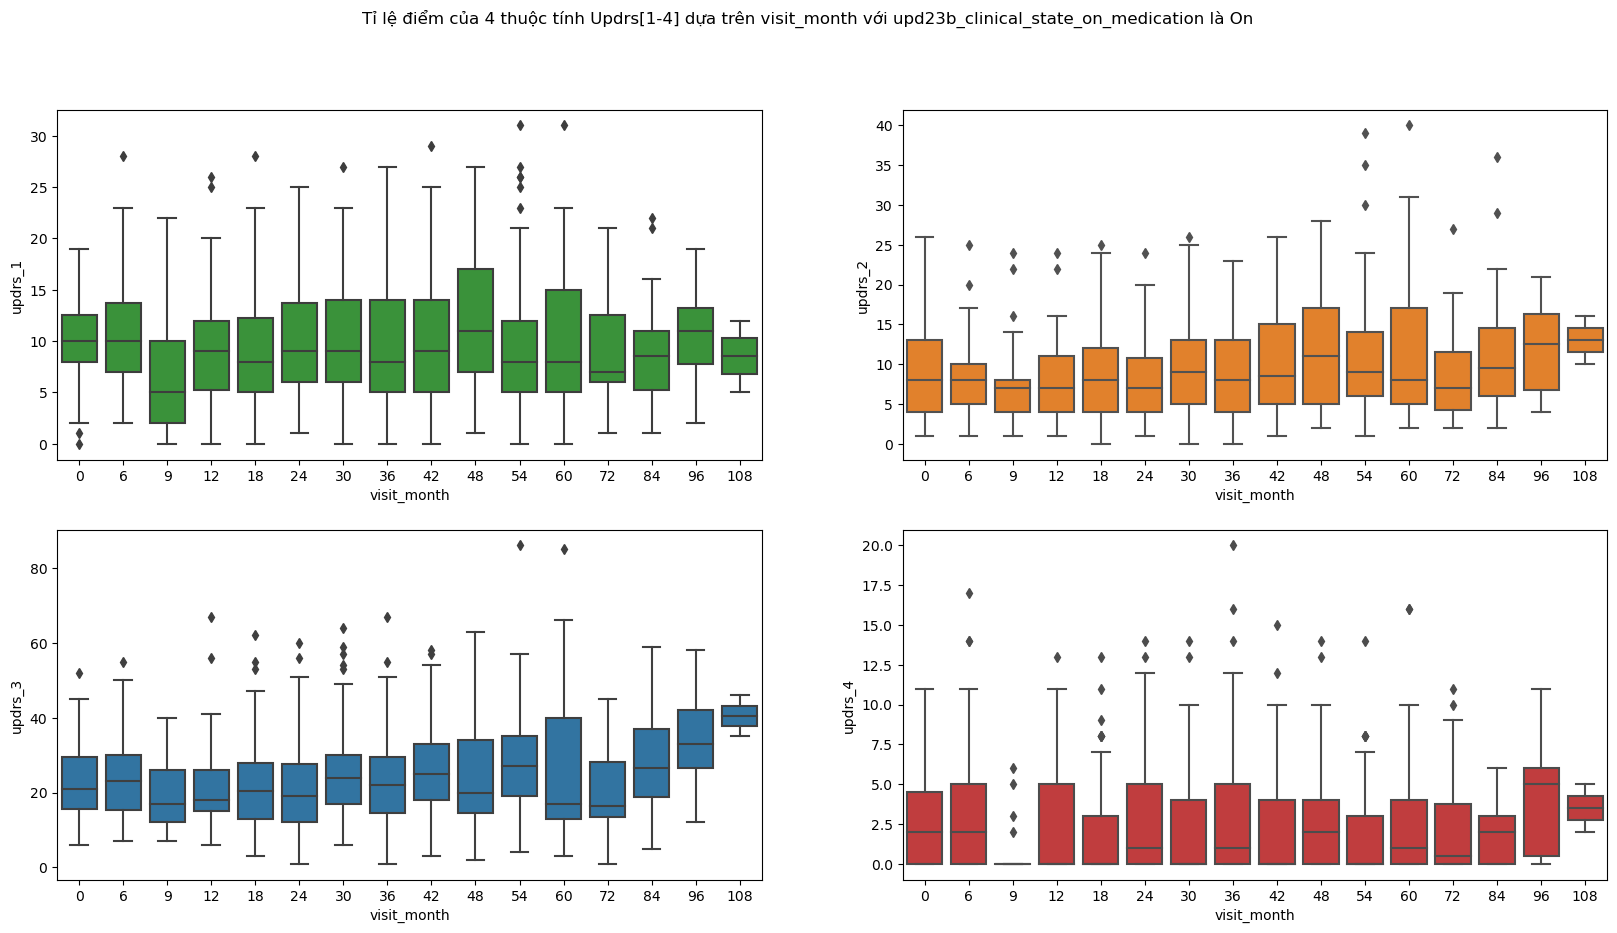

In [78]:
pallete = sns.color_palette("tab10", 5)
fig, axes = plt.subplots(2,2, figsize=(20, 10))
 
fig.suptitle('Tỉ lệ điểm của 4 thuộc tính Updrs[1-4] dựa trên visit_month với upd23b_clinical_state_on_medication là On')

sns.boxplot(ax=axes[0, 0],x=df["visit_month"],y =df["updrs_1"] ,color = pallete[2])
sns.boxplot(ax=axes[0, 1],x=df["visit_month"],y =df["updrs_2"] ,color = pallete[1])
sns.boxplot(ax=axes[1, 0],x=df["visit_month"],y =df["updrs_3"] ,color = pallete[0])
sns.boxplot(ax=axes[1, 1],x=df["visit_month"],y =df["updrs_4"] ,color = pallete[3])

##### NHẬN XÉT :
- Dữ liệu cho thấy ở các thuộc tính updrs_1,2,3 khá tương đồng nhau , dữ liệu phân bố khá đều ở các tháng , tuy nhiên vẫn có các điểm ngoại lai 
- Đối với thuộc tính updrs_4 thì giá trị NaN khá nhiều và xuất hiện nhiều các điểm dữ liệu ngoại lệ có thể là ngoại lai , nhiều hơn so với các updrs còn lại 

#### Tỉ lệ điểm của 4 thuộc tính Updrs[1-4] dựa trên visit_month với upd23b_clinical_state_on_medication là Off

<AxesSubplot:xlabel='visit_month', ylabel='updrs_4'>

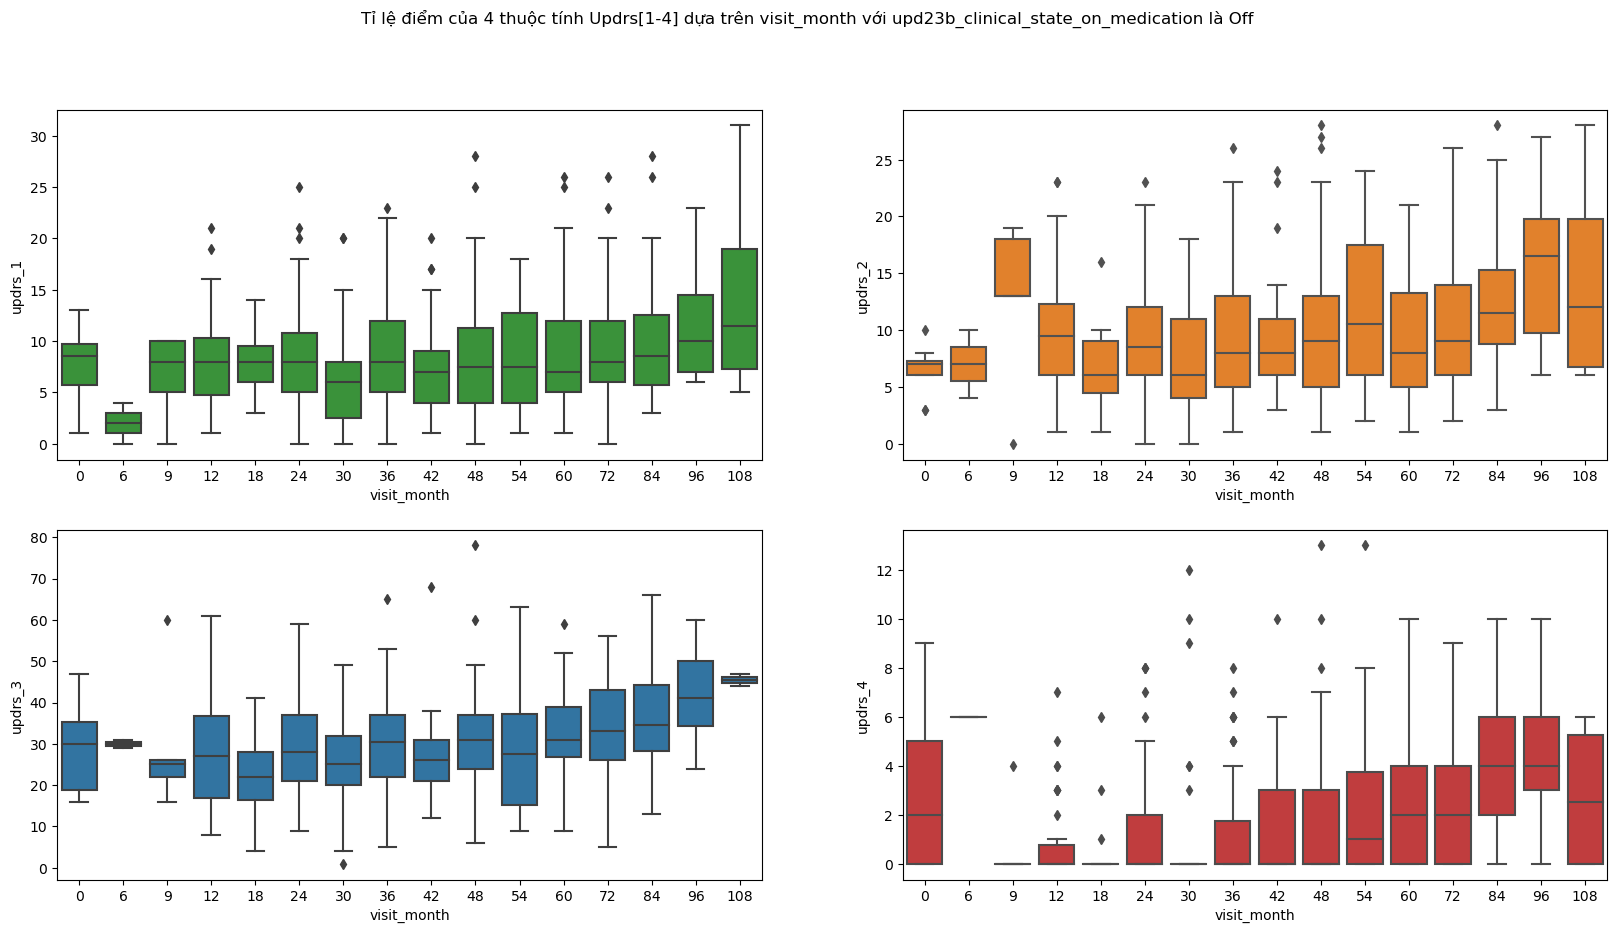

In [79]:
fig, axes = plt.subplots(2,2, figsize=(20, 10))
 
fig.suptitle('Tỉ lệ điểm của 4 thuộc tính Updrs[1-4] dựa trên visit_month với upd23b_clinical_state_on_medication là Off')

sns.boxplot(ax=axes[0, 0],x=df_off["visit_month"],y =df_off["updrs_1"] ,color = pallete[2])
sns.boxplot(ax=axes[0, 1],x=df_off["visit_month"],y =df_off["updrs_2"] ,color = pallete[1])
sns.boxplot(ax=axes[1, 0],x=df_off["visit_month"],y =df_off["updrs_3"] ,color = pallete[0])
sns.boxplot(ax=axes[1, 1],x=df_off["visit_month"],y =df_off["updrs_4"] ,color = pallete[3])

##### NHẬN XÉT :
- Dữ liệu cho thấy giữa updrs_1 và updrs_2 khá tương đồng về dữ liệu - vẫn xuất hiện các điểm ngoại lai ở các thuộc tính này 
- Dữ liệu của thuộc tính updrs_3 phân bố khá ít ở 2 tháng 6 và 108 - vẫn xuất hiện các điểm ngoại lai 
- Đối với updrs_4 Dữ liệu bị thiếu khá nhiều các điểm ngoại lai chiếm phần lớn trong thuộc tính 

# 2.3.2 Phân tích về mối quan hệ giữa các thuộc tính 📊

In [80]:
df_corr = data_clinical.corr()
fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x = df_corr.columns,
        y = df_corr.index,
        z = np.array(df_corr),
        text=df_corr.values,
        texttemplate='%{text:.2f}',
         colorscale ='sunset'
    )
)
fig.show()

Nhận xét: <br/>
- Cả 4 cột điểm đều có độ tương quan thấp đối với cột visit_month
- Nhưng chúng lại có độ tương quan với nhau khá cao. Từ điều này ta có thể biết được các triệu chứng của căn bệnh có liên quan mật thiết với nhau vì đều ảnh hưởng đến các chức năng vận động

Tiếp theo ta sẽ xem xét diễn biến 4 cột điểm theo thời gian như thế nào

<font color=#85C2E9 > Diễn biến của 4 cột điểm theo các tháng

In [81]:
for upd in ["updrs_1","updrs_2","updrs_3","updrs_4"]:
    fig = px.scatter(data_clinical, x="visit_month", y=upd, color="upd23b_clinical_state_on_medication", trendline="ols")
    fig.show()

<font color=#85C2E9 > Độ tương quan giữa 4 thang điểm với các loại proteins

In [82]:
data_clinical[data_clinical['upd23b_clinical_state_on_medication']=='Off'].corr()

,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,null_values_count
patient_id,1.000000,-0.079003,0.032051,-0.039165,0.054467,-0.053515,0.033596
visit_month,-0.079003,1.000000,0.157032,0.195861,0.265885,0.277408,-0.068994
updrs_1,0.032051,0.157032,1.000000,0.657617,0.304638,0.342962,-0.071623
updrs_2,-0.039165,0.195861,0.657617,1.000000,0.517941,0.373278,-0.015005
updrs_3,0.054467,0.265885,0.304638,0.517941,1.000000,0.282634,-0.001512
updrs_4,-0.053515,0.277408,0.342962,0.373278,0.282634,1.000000,NaN
null_values_count,0.033596,-0.068994,-0.071623,-0.015005,-0.001512,NaN,1.000000


In [83]:
data_clinical[['visit_month','updrs_1']]['visit_month'].unique()

array([  0,   3,   6,   9,  12,  18,  24,  30,  36,  42,  48,  54,  60,
        72,  84,  96, 108])

In [84]:
merge_protein_clinical = pd.merge(data_clinical, data_proteins, on=['patient_id','visit_month'])
merge_protein_clinical.columns

Index(['visit_id_x', 'patient_id', 'visit_month', 'updrs_1', 'updrs_2',
       'updrs_3', 'updrs_4', 'upd23b_clinical_state_on_medication',
       'null_values_count', 'visit_id_y', 'UniProt', 'NPX'],
      dtype='object')

In [85]:
columns   = ['updrs_1', 'updrs_2',
             'updrs_3', 'updrs_4','UniProt', 'NPX']
columns_2 = ['UniProt','updrs_1', 'updrs_2',
             'updrs_3', 'updrs_4']
corr_matrix = merge_protein_clinical[columns].groupby('UniProt').corr().reset_index()
corr_matrix = corr_matrix[corr_matrix['level_1']=='NPX'][columns_2].reset_index(drop=True)
corr_matrix = corr_matrix.set_index('UniProt')
for index in range(0,corr_matrix.T.shape[1],15):
    fig = px.imshow(corr_matrix.T.iloc[:,index:index+15],text_auto=True,color_continuous_scale ='sunset')
    fig.show()

In [86]:
top_20_proteins = []
count_all       = []
for col in corr_matrix.columns.tolist():
    temp = corr_matrix.nlargest(20, col).index.tolist()
    top_20_proteins.append(temp)
    count_all.extend(temp)
    print(temp)

['P19827', 'P01594', 'P02748', 'P01009', 'Q562R1', 'O14791', 'P01861', 'P02766', 'P80748', 'P01008', 'P01031', 'P36980', 'P00748', 'P02750', 'Q99683', 'P32754', 'P06310', 'P02679', 'Q14624', 'P04433']
['P01861', 'P01594', 'P01717', 'P01877', 'P00738', 'P01009', 'P02748', 'P01860', 'P02671', 'P01857', 'P01608', 'P19827', 'P02675', 'P02765', 'P04433', 'Q9HDC9', 'P80748', 'P02679', 'P02763', 'Q9Y6R7']
['P01861', 'P01877', 'P00738', 'P01859', 'P02671', 'P01717', 'P01594', 'P01009', 'P02748', 'P35542', 'Q9HDC9', 'P02675', 'Q14624', 'P61626', 'P16152', 'P02679', 'P01608', 'P01011', 'P04433', 'P19827']
['P16152', 'P31997', 'P23083', 'P11277', 'P19827', 'P55290', 'Q7Z5P9', 'P04275', 'O75144', 'P43251', 'O14791', 'Q13283', 'O94919', 'P10451', 'P40925', 'O43505', 'P02766', 'P02765', 'Q8IWV7', 'P06310']


In [87]:
occu = pd.DataFrame.from_dict(Counter(count_all), orient='index')
occu = occu.sort_values(by=[0],ascending=False)
occu

,0
P19827,4
P01861,3
P01594,3
P04433,3
P02679,3
P02748,3
P01009,3
O14791,2
P16152,2
Q9HDC9,2


Như ta có thể thấy, protein  **P19827** có sự tương quan lớn đến cả 4 thang điểm.<br/>
Các proteins **P01594, P02748, P01009, P01861, P02679, P04433** chỉ có sự tương quan lớn đến 3 thang điểm.<br/>
Các protein còn lại thì tương quan với 1 hoặc 2 thang điểm.

Tuy nhiên, chúng ta cũng cần xét tới tỷ lệ của chúng trong tập dữ liệu, nếu độ tương quan cao mà tỷ lệ thấp thì cũng không có ý nghĩa gì.

<font color=#85C2E9 > Tỷ lệ các protein trong mẫu CFS của bệnh nhân

In [88]:
percent_protein = {}
for protein in occu.index.tolist():
    percent_protein[protein] = data_proteins[data_proteins.UniProt == protein].shape[0]*100 \
                                                        /data_clinical.shape[0]
percent_protein = pd.DataFrame.from_dict(percent_protein,orient='index').sort_values(by=[0],ascending=False)
fig = px.bar(percent_protein,orientation='h')
fig.show()

Các protein đều có tỷ lệ % xuất hiện trong các mẫu lớn hơn 23%, nên chúng ta không cần loại bỏ mẫu nào

# 3. KHAI THÁC DỮ LIỆU

# 3.1. ARIMA + Linear Interpolation

# 3.1.1. Trích chọn và Rút trích đặc trưng

![Image](https://raw.githubusercontent.com/baobuiquang/AMP-ParkinsonDiseaseProgression/main/assets/image01.png)

Sau nhiều lần thử nghiệm với các thay đổi khác nhau, nhóm có nhận xét như sau:

Khi sử dụng mô hình ARIMA:

* Kết hợp bộ dữ liệu `supplement` với `clinical` cho ra kết quả tốt hơn (so với chỉ sử dụng bộ dữ liệu `clinical`)
* Loại bỏ những bệnh nhân khám ít hơn 24 tháng ra khỏi bộ dữ liệu cho ra kết quả tốt hơn.
* Nếu bỏ đi những dòng dữ liệu có `visit_month` > 24 (hay nói cách khác, chỉ giữ lại những tháng 0, 6, 12, 24) thì cho ra kết quả tương đương chứ không bị tệ đi.
* Nếu 1 bệnh nhân bị thiếu dữ liệu các tháng ở giữa (ví dụ chỉ có dữ liệu tháng 0 và tháng 36, bị thiếu dữ liệu các tháng 6, 12 và 24) thì điền những giá trị thiếu bằng Linear Interpolation cho ra kết quả tốt hơn (so với việc loại bỏ bệnh nhân đó, hoặc là chỉ drop những tháng bị thiếu)
* Nếu không sử dụng Linear Interpolation để điền dữ liệu bị thiếu, thì lúc train mô hình cho điểm UPDRS nào thì mới drop NaN trên cột điểm UPDRS đó thì ra kết quả tốt hơn (so với việc là trước khi train mô hình, drop tất cả những dòng nào có giá trị NaN)

Từ nhận xét trên, ở phiên bản cuối cùng xây dựng mô hình ARIMA, nhóm sẽ thực hiện tiền xử lý như sau:

* Sử dụng kết hợp 2 bộ dữ liệu `clinical` và `supplement`
* Loại bỏ những bệnh nhân có thời gian khám ít hơn 24 tháng
* Loại bỏ những dòng dữ liệu có `visit_month` > 24 (chỉ giữ lại những tháng 0, 6, 12, 24)
* Sử dụng Linear Interpolation để điền giá trị điểm UPDRS bị thiếu

In [89]:
import amp_pd_peptide
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import missingno as msno
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
pd.options.mode.chained_assignment = None  # default='warn'
plt.rc("figure",figsize=(12,5))

In [90]:
train_clinical_data = pd.read_csv('/kaggle/input/amp-parkinsons-disease-progression-prediction/train_clinical_data.csv')
train_clinical_data['source'] = 'standard'
supplemental_clinical_data = pd.read_csv('/kaggle/input/amp-parkinsons-disease-progression-prediction/supplemental_clinical_data.csv')
supplemental_clinical_data['source'] = 'supplemental'
train_clinical_all = pd.concat([train_clinical_data, supplemental_clinical_data])

# train_clinical_all = train_clinical_all[~train_clinical_all.visit_month.isin([3, 5, 9])]
# train_clinical_all = train_clinical_all[train_clinical_all.visit_month.isin([0, 6, 12, 24])]

cli_data = train_clinical_all
pep_data = pd.read_csv('/kaggle/input/amp-parkinsons-disease-progression-prediction/train_peptides.csv')
pro_data = pd.read_csv('/kaggle/input/amp-parkinsons-disease-progression-prediction/train_proteins.csv')

In [91]:
def get_train_data(pep_data, pro_data, cli_data, join_type = 'inner'):
    # Average PeptideAbundance of all proteins
    avg_abundance_one_row = pep_data.groupby(['visit_id']).mean().reset_index().drop(columns=['visit_month', 'patient_id']).rename(columns = {'PeptideAbundance':'PeptideAbundance_AVG'})
    # Average NPX of all proteins
    avg_npx_one_row = pro_data.groupby(['visit_id']).mean().reset_index()[['visit_id', 'NPX']].rename(columns = {'NPX':'NPX_AVG'})
    # NPX of important proteins
    NPX_P19827 = pro_data[pro_data['UniProt']=='P19827'][['visit_id', 'NPX']].rename(columns = {'NPX':'NPX_P19827'})
    # Join on visit_id
    train = cli_data.merge(
        avg_abundance_one_row, on='visit_id', how=join_type
    ).merge(
        avg_npx_one_row, on='visit_id', how=join_type
    ).merge(
        NPX_P19827, on='visit_id', how=join_type
    )
    return train

train = get_train_data(pep_data, pro_data, cli_data, join_type = 'outer')
train = train.dropna(subset=['patient_id', 'visit_month'])
train = train.sort_values(by=['patient_id', 'visit_month'], ascending=[True, True])

train

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,source,PeptideAbundance_AVG,NPX_AVG,NPX_P19827
2615,35_0,35.0,0.0,5.0,3.0,16.0,0.0,NaN,supplemental,NaN,NaN,NaN
2616,35_36,35.0,36.0,6.0,4.0,20.0,0.0,NaN,supplemental,NaN,NaN,NaN
0,55_0,55.0,0.0,10.0,6.0,15.0,NaN,NaN,standard,748153.907014,3.180508e+06,36232.9
1,55_3,55.0,3.0,10.0,7.0,25.0,NaN,NaN,standard,NaN,NaN,NaN
2,55_6,55.0,6.0,8.0,10.0,34.0,NaN,NaN,standard,685218.599872,2.942039e+06,14899.5
...,...,...,...,...,...,...,...,...,...,...,...,...
4833,65382_0,65382.0,0.0,NaN,NaN,0.0,NaN,NaN,supplemental,NaN,NaN,NaN
4834,65405_0,65405.0,0.0,5.0,16.0,31.0,0.0,NaN,supplemental,NaN,NaN,NaN
4835,65405_5,65405.0,5.0,NaN,NaN,57.0,NaN,NaN,supplemental,NaN,NaN,NaN
4836,65530_0,65530.0,0.0,10.0,6.0,24.0,0.0,NaN,supplemental,NaN,NaN,NaN


In [92]:
patient_have_visit_than_24 = train[train['visit_month']>=24]['patient_id'].unique()
train = train[train['patient_id'].isin(patient_have_visit_than_24)]
train

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,source,PeptideAbundance_AVG,NPX_AVG,NPX_P19827
2615,35_0,35.0,0.0,5.0,3.0,16.0,0.0,NaN,supplemental,NaN,NaN,NaN
2616,35_36,35.0,36.0,6.0,4.0,20.0,0.0,NaN,supplemental,NaN,NaN,NaN
0,55_0,55.0,0.0,10.0,6.0,15.0,NaN,NaN,standard,748153.907014,3.180508e+06,36232.9
1,55_3,55.0,3.0,10.0,7.0,25.0,NaN,NaN,standard,NaN,NaN,NaN
2,55_6,55.0,6.0,8.0,10.0,34.0,NaN,NaN,standard,685218.599872,2.942039e+06,14899.5
...,...,...,...,...,...,...,...,...,...,...,...,...
4830,65290_30,65290.0,30.0,4.0,16.0,13.0,0.0,On,supplemental,NaN,NaN,NaN
4831,65303_0,65303.0,0.0,0.0,2.0,20.0,0.0,NaN,supplemental,NaN,NaN,NaN
4832,65303_36,65303.0,36.0,4.0,1.0,26.0,0.0,NaN,supplemental,NaN,NaN,NaN
4836,65530_0,65530.0,0.0,10.0,6.0,24.0,0.0,NaN,supplemental,NaN,NaN,NaN


In [93]:
visit_month_ls = [0,6,12,24]
patient_id_ls = []
for p in train['patient_id'].unique():
    for i in range(len(visit_month_ls)):
        patient_id_ls.append(p)
visit_month_ls = visit_month_ls * len(train['patient_id'].unique())

dummy_df = pd.DataFrame(
    {'patient_id': patient_id_ls, 'visit_month': visit_month_ls}
)

dummy_df

,patient_id,visit_month
0,35.0,0
1,35.0,6
2,35.0,12
3,35.0,24
4,55.0,0
...,...,...
2951,65303.0,24
2952,65530.0,0
2953,65530.0,6
2954,65530.0,12


In [94]:
merged_df = pd.merge(train, dummy_df, on=['patient_id', 'visit_month'], how='outer')
merged_df = merged_df.sort_values(by=['patient_id', 'visit_month'], ascending=[True, True])
merged_df

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,source,PeptideAbundance_AVG,NPX_AVG,NPX_P19827
0,35_0,35.0,0.0,5.0,3.0,16.0,0.0,NaN,supplemental,NaN,NaN,NaN
4405,NaN,35.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4406,NaN,35.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4407,NaN,35.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,35_36,35.0,36.0,6.0,4.0,20.0,0.0,NaN,supplemental,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4403,65530_0,65530.0,0.0,10.0,6.0,24.0,0.0,NaN,supplemental,NaN,NaN,NaN
5291,NaN,65530.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5292,NaN,65530.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5293,NaN,65530.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
interpolated_df = merged_df.interpolate(subset=['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4'])
interpolated_df

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,source,PeptideAbundance_AVG,NPX_AVG,NPX_P19827
0,35_0,35.0,0.0,5.00,3.00,16.00,0.0,NaN,supplemental,NaN,NaN,NaN
4405,NaN,35.0,6.0,5.25,3.25,17.00,0.0,NaN,NaN,NaN,NaN,NaN
4406,NaN,35.0,12.0,5.50,3.50,18.00,0.0,NaN,NaN,NaN,NaN,NaN
4407,NaN,35.0,24.0,5.75,3.75,19.00,0.0,NaN,NaN,NaN,NaN,NaN
1,35_36,35.0,36.0,6.00,4.00,20.00,0.0,NaN,supplemental,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4403,65530_0,65530.0,0.0,10.00,6.00,24.00,0.0,NaN,supplemental,669411.457384,2.917391e+06,24047.4
5291,NaN,65530.0,6.0,9.50,5.50,21.75,1.0,NaN,NaN,669411.457384,2.917391e+06,24047.4
5292,NaN,65530.0,12.0,9.00,5.00,19.50,2.0,NaN,NaN,669411.457384,2.917391e+06,24047.4
5293,NaN,65530.0,24.0,8.50,4.50,17.25,3.0,NaN,NaN,669411.457384,2.917391e+06,24047.4


In [96]:
train = interpolated_df[interpolated_df['visit_month'].isin([0, 6, 12, 24])]
train.index = pd.DatetimeIndex(train['visit_month']).to_period('M')
train

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,source,PeptideAbundance_AVG,NPX_AVG,NPX_P19827
visit_month,,,,,,,,,,,,
1970-01,35_0,35.0,0.0,5.00,3.00,16.00,0.0,NaN,supplemental,NaN,NaN,NaN
1970-01,NaN,35.0,6.0,5.25,3.25,17.00,0.0,NaN,NaN,NaN,NaN,NaN
1970-01,NaN,35.0,12.0,5.50,3.50,18.00,0.0,NaN,NaN,NaN,NaN,NaN
1970-01,NaN,35.0,24.0,5.75,3.75,19.00,0.0,NaN,NaN,NaN,NaN,NaN
1970-01,55_0,55.0,0.0,10.00,6.00,15.00,0.0,NaN,standard,748153.907014,3.180508e+06,36232.9
...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01,NaN,65303.0,24.0,3.00,1.25,24.50,0.0,NaN,NaN,669411.457384,2.917391e+06,24047.4
1970-01,65530_0,65530.0,0.0,10.00,6.00,24.00,0.0,NaN,supplemental,669411.457384,2.917391e+06,24047.4
1970-01,NaN,65530.0,6.0,9.50,5.50,21.75,1.0,NaN,NaN,669411.457384,2.917391e+06,24047.4


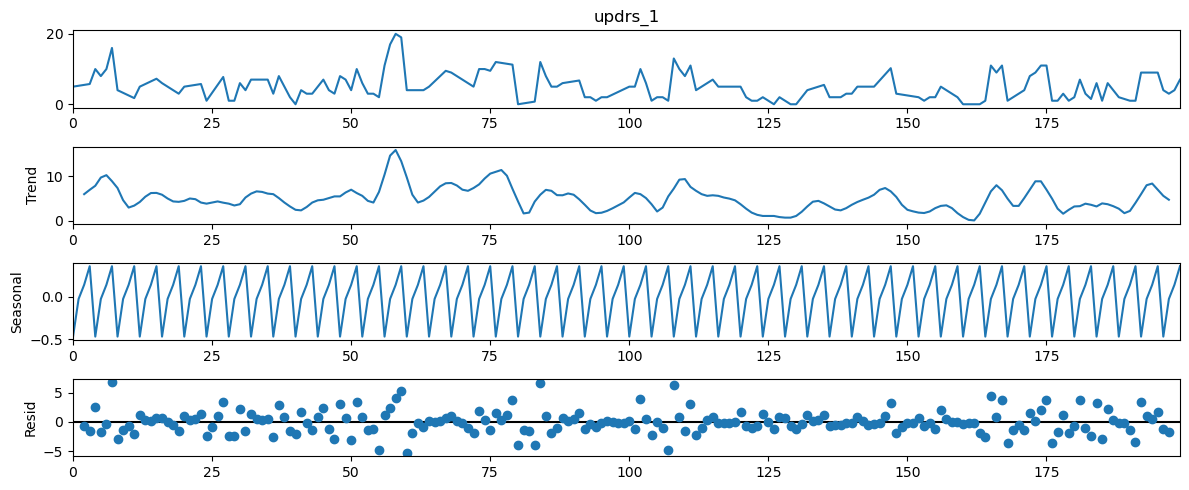

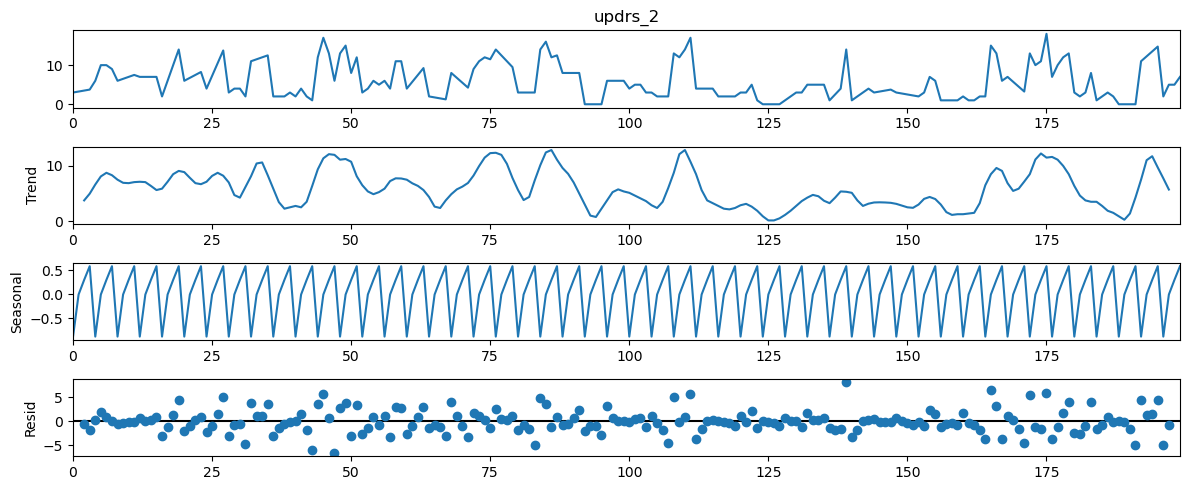

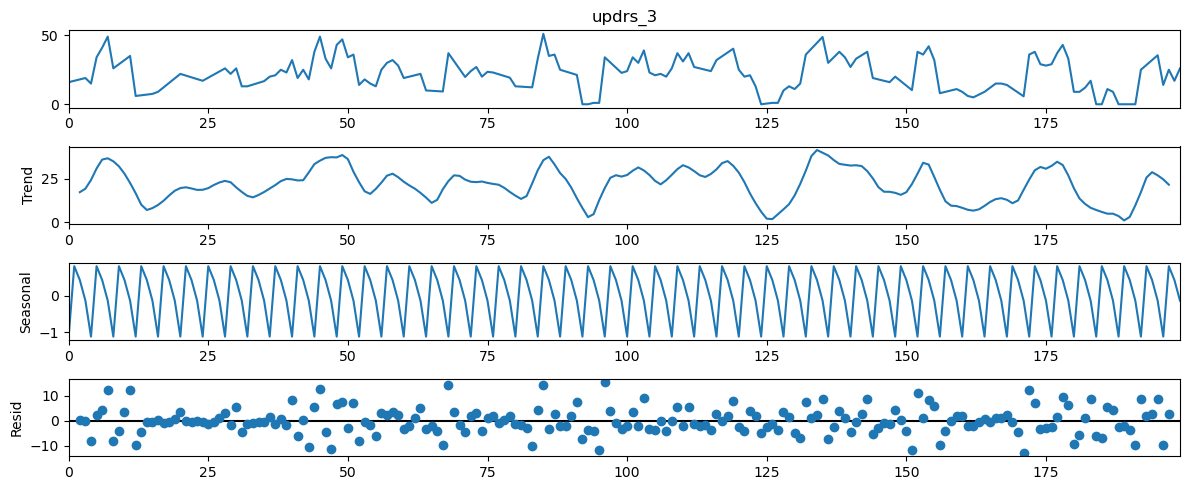

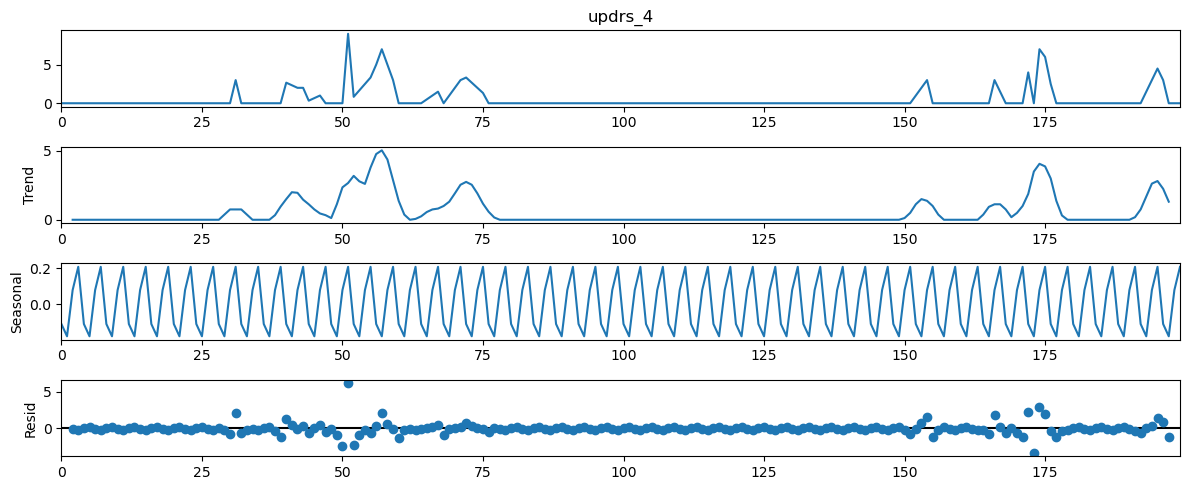

In [97]:
# Seasonal or Non-seasonal?        -> Seasonal (period=4)
# Trend or Non-trend?              -> Non-trend
# Non-stationary or stationary?    -> Stationary

for updrs in ["updrs_1", "updrs_2", "updrs_3", "updrs_4"]:
    updrs_values = train[[updrs]].reset_index()[updrs][:200]
    res = sm.tsa.seasonal_decompose(updrs_values, period = 4, model="additive")
    fig = res.plot()
    fig.tight_layout()
    plt.show()

# 3.1.2. Xây dựng mô hình

Mô hình $SARIMA$ (Seasonal AutoRegressive Integrated Moving Average) cấu hình từ 7 tham số:

$$SARIMA(p,d,q)(P,D,Q)[m]$$

Với:

3 tham số $p,d,q$ tương tự như ở mô hình $ARIMA$:

* $p$: Bậc của mô hình $AR$ - autoregressive (số lượng độ trễ thời gian - "lags" của dữ liệu dùng để dự đoán).

* $d$: Mức độ chênh lệch - regular differencing (số lần mà dữ liệu trừ đi các giá trị trong quá khứ) cần thiết để khiến cho dữ liệu tĩnh (stationary, not trendy). Nếu dữ liệu đầu vào đã tĩnh (stationary) sẵn thì $d=0$.

* $q$: Bậc của mô hình $MA$ - moving-average (số lượng lỗi - lagged forecast error được đưa vào mô hình).

Mô hình $SARIMA$ bổ sung thêm 3 tham số bắt buộc và 1 tham số tuỳ chọn, có liên quan đến tính chu kỳ (seasonal) như sau:

* $P$: Tương tự $p$, nhưng mà là bậc của mô hình $SAR$ - seasonal autoregressive.

* $D$: Tương tự $d$, nhưng là mức độ chênh lệch theo chu kỳ - seasonal differencing.

* $Q$: Tương tự $q$, nhưng mà là bậc của mô hình $SMA$ - seasonal moving-average.

* $m$: Số bước/giai đoạn của một chu kỳ thời gian (Ví dụ: Chu kỳ thời gian là 1 năm, chúng ta có dữ liệu của mỗi tháng, vậy $m=12$ vì 1 năm có 12 tháng)

In [98]:
%%time

target = ["updrs_1", "updrs_2", "updrs_3", "updrs_4"]

# Dictionary to store the models for each UPDRS score
model = {u: None for u in target}

for updrs in target:
    temp = train #.dropna(subset=[updrs])
    y = temp[updrs]

    # Fit the ARIMA model
    trained = ARIMA(y, order=(4, 0, 1), seasonal_order=(0, 0, 0, 4)).fit()
    model[updrs] = trained

model

CPU times: user 7.05 s, sys: 12.2 s, total: 19.3 s
Wall time: 5.01 s


{'updrs_1': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x787577ba1890>,
 'updrs_2': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x787577d9c210>,
 'updrs_3': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x787577d7b0d0>,
 'updrs_4': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x787577d46d90>}

In [99]:
def get_predictions(my_test, model):
    my_test = my_test.fillna(0)
    for u in target:
        my_test['result_' + str(u)] = 0
        # Predict    
        X = my_test["visit_month"]
        if u == 'updrs_4':
            my_test['result_' + str(u)] = 0
        else:
            n = len(model[u].model.endog)
            start = n
            end = n + len(X) - 1
            my_test['result_' + str(u)] = np.ceil(model[u].predict(start=start, end=end).values)
    result = pd.DataFrame()
    for m in [0, 6, 12, 24]:
        for u in [1, 2, 3, 4]:
            temp = my_test[["visit_id", "result_updrs_" + str(u)]]
            temp["prediction_id"] = temp["visit_id"] + "_updrs_" + str(u) + "_plus_" + str(m) + "_months"
            temp["rating"] = temp["result_updrs_" + str(u)]
            temp = temp [['prediction_id', 'rating']]
            result = result.append(temp)
    result = result.drop_duplicates(subset=['prediction_id'])
    result['rating'] = result['rating'] + 0.0 # -0.0 -> 0.0
    result = result.reset_index().drop(columns=['index'])
    return result

In [100]:
%%time

env = amp_pd_peptide.make_env()
iter_test = env.iter_test()
for (test, test_peptides, test_proteins, sample_submission) in iter_test:
    my_test = get_train_data(test_peptides, test_proteins, test, join_type='left')
    result = get_predictions(my_test,model)
    env.predict(result)

This version of the API is not optimized and should not be used to estimate the runtime of your code on the hidden test set.
CPU times: user 172 ms, sys: 0 ns, total: 172 ms
Wall time: 191 ms


In [101]:
result

,prediction_id,rating
0,3342_6_updrs_1_plus_0_months,7.0
1,50423_6_updrs_1_plus_0_months,6.0
2,3342_6_updrs_2_plus_0_months,5.0
3,50423_6_updrs_2_plus_0_months,6.0
4,3342_6_updrs_3_plus_0_months,18.0
5,50423_6_updrs_3_plus_0_months,21.0
6,3342_6_updrs_4_plus_0_months,0.0
7,50423_6_updrs_4_plus_0_months,0.0
8,3342_6_updrs_1_plus_6_months,7.0
9,50423_6_updrs_1_plus_6_months,6.0


# 3.1.3. Kết quả và nhận xét

### Nhận xét 1

Giải thích cho việc:
- Loại bỏ những bệnh nhân có thời gian khám ít hơn 24 tháng -> Kết quả tốt hơn
- Loại bỏ những dòng dữ liệu có visit_month > 24 -> Kết quả tốt hơn

Vì: Khi tiền xử lý dữ liệu như trên, dữ liệu cuối cùng sẽ là 1 chuỗi time-series có cấu trúc `visit_month` (thời gian) của 1 bệnh nhân lần lượt là các giá trị 0, 6, 12, 24.

Khi có cấu trúc như thế này, vô hình chung chuỗi time-series sẽ có chu kỳ bằng 4. 

Mà mô hình SARIMA lại hoạt động tốt nếu chuỗi dữ liệu có tính chu kỳ, từ đó mà kết quả cho ra tốt hơn.

### Nhận xét 2

Giải thích cho việc:
- Sử dụng kết hợp 2 bộ dữ liệu clinical và supplement -> Kết quả tốt hơn

Vì:
- Với hướng tiếp cận không sử dụng dữ liệu proteins và peptides, 2 bộ dữ liệu `clinical` và `supplemental` (vốn đã có cấu trúc giống nhau) sẽ mang lại giá trị tương đương nhau (so sánh với trường hợp sử dụng dữ liệu đo nồng độ proteins thì rõ ràng bộ dữ liệu `supplemental` mang giá trị thấp hơn vì bệnh nhân ở tập này không được đo nồng độ proteins).
- Vì giá trị của 2 bộ dữ liệu tương đương nhau nên khi kết hợp, kết quả cho ra tốt hơn (vì đơn giản là mô hình có nhiều dữ liệu hơn để học)

### Kết luận

* Bệnh Parkinson có xu hướng tiến triển và nặng dần đều theo thời gian. Khi sử dụng Linear Interpolation để điền giá trị điểm UPDRS bị thiếu, mô hình cho ra kết quả tốt hơn giúp củng cố hơn kết luận này.
* Bệnh nhân có sử dụng thuốc trong quá trình điều trị, mặc dù vẫn nặng lên theo thời gian, nhưng tiến triển sẽ chậm hơn so với bệnh nhân không sử dụng thuốc trong điều trị.
* Những proteins có ảnh hưởng lớn đến tiến triển bệnh Parkinson:
  - P19827 có sự tương quan lớn đến cả 4 thang điểm UPDRS
  - Các proteins P01594, P02748, P01009, P01861, P02679, P04433 có sự tương quan lớn đến 3/4 thang điểm.
